In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

pd.reset_option('display.max_columns')

# Replace 'your_folder_path' with the actual path to your folder
folder_path = 'chr_v2'

# Get a list of all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty list to store individual DataFrames
dfs = []

# Iterate through each CSV file and append its content to the list
for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)
    #break

# Concatenate all DataFrames in the list into a single DataFrame
gnom_df = pd.concat(dfs, ignore_index=True)

gnom_df = gnom_df.dropna(subset=['rsIDs', 'Gene', 'Gene ID'])

gnom_df = gnom_df[gnom_df['rsIDs'] != "."]

print(gnom_df.shape)

gnom_df.head(10)

(8524863, 32)


,Unnamed: 0,Chromosome,Position,rsIDs,Reference,Alternate,Allele Count,Allele Number,Allele Count Amish,Allele Number Amish,...,Allele Count Remaining,Allele Number Remaining,Allele Count African/African American,Allele Number African/African American,Allele Count Middle Eastern,Allele Number Middle Eastern,VEP Annotation,Gene,Gene ID,Transcript ID
0,0,chr1,12607,rs1639578846,C,T,0,106,0,0,...,0,4,0,72,0,0,splice_polypyrimidine_tract_variant&splice_reg...,DDX11L1,ENSG00000223972,ENST00000450305
1,1,chr1,12607,rs1639578846,C,T,0,106,0,0,...,0,4,0,72,0,0,splice_polypyrimidine_tract_variant&splice_reg...,DDX11L1,ENSG00000223972,ENST00000456328
2,2,chr1,12607,rs1639578846,C,T,0,106,0,0,...,0,4,0,72,0,0,splice_polypyrimidine_tract_variant&splice_reg...,DDX11L1,100287102,NR_046018.2
3,3,chr1,12697,rs1463148482,T,C,0,12730,0,34,...,0,188,0,6946,0,46,splice_region_variant&non_coding_transcript_ex...,DDX11L1,ENSG00000223972,ENST00000450305
4,4,chr1,12719,rs1410641955,G,C,299,18986,0,52,...,7,254,27,10330,1,60,splice_region_variant&non_coding_transcript_ex...,DDX11L1,ENSG00000223972,ENST00000456328
5,5,chr1,12719,rs1410641955,G,C,299,18986,0,52,...,7,254,27,10330,1,60,splice_region_variant&non_coding_transcript_ex...,DDX11L1,100287102,NR_046018.2
6,6,chr1,12729,rs1330948666,G,T,0,25546,0,102,...,0,338,0,12344,0,102,splice_region_variant&intron_variant&non_codin...,DDX11L1,ENSG00000223972,ENST00000456328
7,7,chr1,12729,rs1330948666,G,T,0,25546,0,102,...,0,338,0,12344,0,102,splice_region_variant&intron_variant&non_codin...,DDX11L1,100287102,NR_046018.2
9,9,chr1,13049,rs1639583754,AT,A,1,124686,0,734,...,0,1606,1,38436,0,258,splice_region_variant&non_coding_transcript_ex...,DDX11L1,ENSG00000223972,ENST00000450305
10,10,chr1,13052,rs1490953354,G,C,4,125182,0,740,...,0,1612,2,38486,0,258,splice_region_variant&non_coding_transcript_ex...,DDX11L1,ENSG00000223972,ENST00000450305


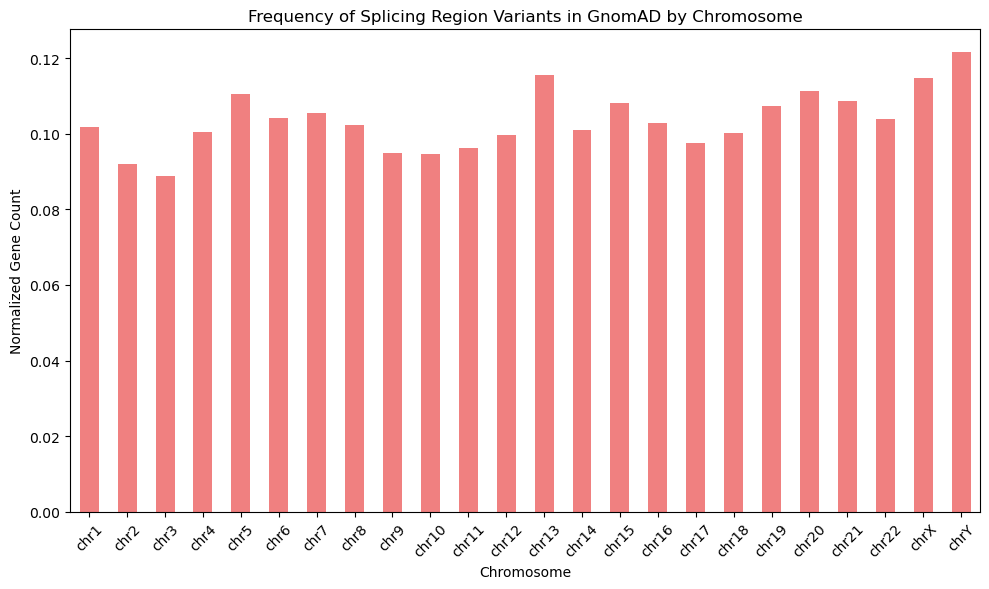

In [2]:
# Group by 'chromo' and count the number of variants (rows) for each chromosome
variants_by_chromo = gnom_df.groupby('Chromosome').size()

# Group by 'chromo' and count the number of unique gene names for each chromosome
genename_count_by_chromo = gnom_df.groupby('Chromosome')['Position'].nunique()

# Normalize gene name counts by the number of variants for each chromosome
normalized_gene_count = genename_count_by_chromo / variants_by_chromo

# Extract the numeric part of chromosome labels for sorting, including special cases for 'X', 'Y', and 'MT'
chromosome_numeric = normalized_gene_count.index.to_series().apply(
    lambda x: int(x[3:]) if x[3:].isdigit() else (23 if x[3:] == 'X' else (24 if x[3:] == 'Y' else 25))
)

# Sort by the numeric values but retain the original 'chromo' labels
normalized_gene_count = normalized_gene_count.iloc[chromosome_numeric.argsort()]

# Plot the normalized gene name count by chromosome (with original labels)
plt.figure(figsize=(10, 6))
normalized_gene_count.plot(kind='bar', color='lightcoral')

# Add labels and title
plt.title('Frequency of Splicing Region Variants in GnomAD by Chromosome')
plt.xlabel('Chromosome')
plt.ylabel('Normalized Gene Count')

# Show the plot with properly sorted 'chr' labels
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
normalized_gene_count.index

Index(['chr1', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16',
       'chr17', 'chr18', 'chr19', 'chr2', 'chr20', 'chr21', 'chr22', 'chr3',
       'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chrX', 'chrY'],
      dtype='object', name='Chromosome')

In [4]:
import os

# Replace 'your_folder_path' with the actual path to your folder
folder_path = 'chr'

# Get a list of all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Initialize an empty list to store individual DataFrames
dfs = []

# Iterate through each CSV file and append its content to the list
for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    df = pd.read_csv(file_path)
    dfs.append(df)
    #break

# Concatenate all DataFrames in the list into a single DataFrame
gtex_df = pd.concat(dfs, ignore_index=True)

print(gtex_df.shape)


count_group = gtex_df.groupby(['start', 'end']).size().reset_index(name='count')
count_group['length'] = count_group['end'] - count_group['start'] + 1
count_group['frequency'] = count_group['count'] / count_group['length']

frequency_df = count_group[['start', 'end', 'frequency']]

gtex_df.head(10)


(113430, 66)


,Unnamed: 0,chromo,strand,start,end,genename,Major_Exon_Size,count,alt5,constitLevel,...,Allele Frequency South Asian,Allele Count Remaining,Allele Number Remaining,Allele Frequency Remaining,Allele Count African/African American,Allele Number African/African American,Allele Frequency African/African American,Allele Count Middle Eastern,Allele Number Middle Eastern,Allele Frequency Middle Eastern
0,0,chr1,-,945056,945146,NOC2L,90,45,29,0.608,...,0.000000,0,2088,0.0,0,41476,0.000000,0.0,316.0,0.000000
1,1,chr1,-,945056,945146,NOC2L,90,45,29,0.608,...,0.000207,0,2094,0.0,0,41418,0.000000,0.0,316.0,0.000000
2,2,chr1,-,945056,945146,NOC2L,90,45,29,0.608,...,0.000000,0,2108,0.0,0,41458,0.000000,0.0,294.0,0.000000
3,3,chr1,-,945056,945146,NOC2L,90,45,29,0.608,...,0.000000,0,2092,0.0,1,41390,0.000024,0.0,316.0,0.000000
4,4,chr1,-,945056,945146,NOC2L,90,45,29,0.608,...,0.000000,0,2090,0.0,1,41418,0.000024,0.0,316.0,0.000000
5,5,chr1,-,945056,945146,NOC2L,90,45,29,0.608,...,0.000000,0,2092,0.0,1,41404,0.000024,0.0,316.0,0.000000
6,6,chr1,-,945056,945146,NOC2L,90,45,29,0.608,...,0.000000,0,2112,0.0,0,41526,0.000000,1.0,294.0,0.003401
7,7,chr1,-,945056,945146,NOC2L,90,45,29,0.608,...,0.000000,0,2090,0.0,1,41406,0.000024,0.0,316.0,0.000000
8,8,chr1,-,945056,945146,NOC2L,90,45,29,0.608,...,0.000000,0,2092,0.0,1,41448,0.000024,0.0,316.0,0.000000
9,9,chr1,-,945056,945146,NOC2L,90,45,29,0.608,...,0.000000,0,2092,0.0,5,41412,0.000121,0.0,316.0,0.000000


In [15]:
gnom_df.columns

Index(['Unnamed: 0', 'Chromosome', 'Position', 'rsIDs', 'Reference',
       'Alternate', 'Allele Count', 'Allele Number', 'Allele Count Amish',
       'Allele Number Amish', 'Allele Count Admixed American',
       'Allele Number Admixed American', 'Allele Count Ashkenazi Jewish',
       'Allele Number Ashkenazi Jewish', 'Allele Count East Asian',
       'Allele Number East Asian', 'Allele Count European (Finnish)',
       'Allele Number European (Finnish)',
       'Allele Count European (non-Finnish)',
       'Allele Number European (non-Finnish)', 'Allele Count South Asian',
       'Allele Number South Asian', 'Allele Count Remaining',
       'Allele Number Remaining', 'Allele Count African/African American',
       'Allele Number African/African American', 'Allele Count Middle Eastern',
       'Allele Number Middle Eastern', 'VEP Annotation', 'Gene', 'Gene ID',
       'Transcript ID'],
      dtype='object')

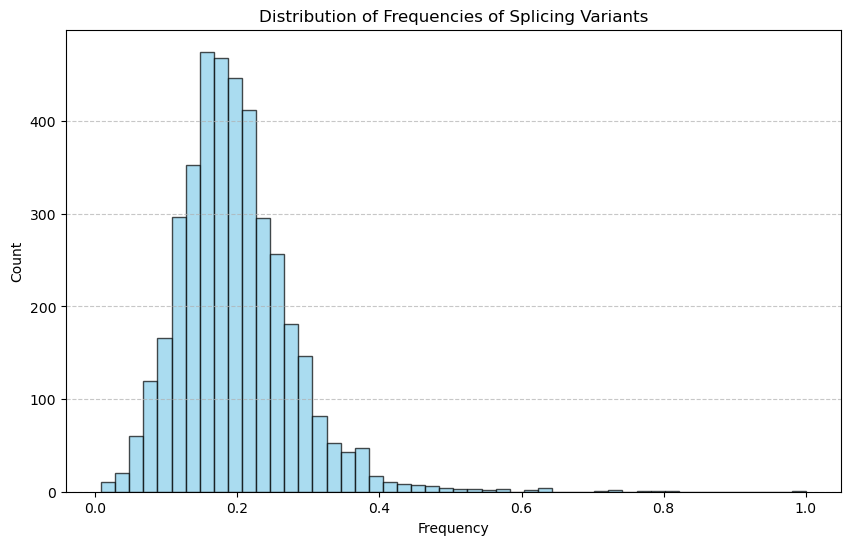

In [18]:
# Function to plot the distribution of frequencies
def plot_frequency_distribution(frequency_df):
    plt.figure(figsize=(10, 6))
    plt.hist(frequency_df['frequency'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    plt.title('Distribution of Frequencies of Splicing Variants')
    plt.xlabel('Frequency')
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Call the function with your frequency DataFrame
plot_frequency_distribution(frequency_df)

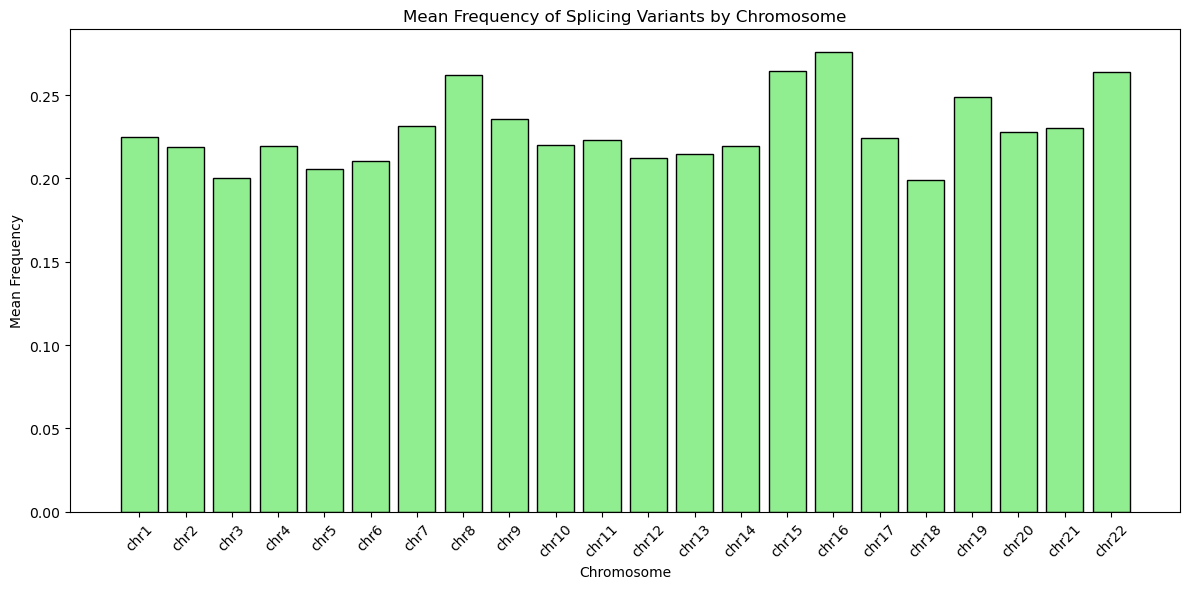

In [19]:
import matplotlib.pyplot as plt

# Function to plot the mean frequency by chromosome
def plot_frequency_by_chromosome(gtex_df, frequency_df):
    # Merge the frequency_df with gnom_df to get chromosome information
    merged_df = gtex_df.merge(frequency_df, on=['start', 'end'], how='inner')
    
    # Group by chromosome and calculate the mean frequency for each chromosome
    frequency_by_chromosome = merged_df.groupby('chromo')['frequency'].mean().reset_index()
    
    # Sort chromosomes for proper plotting
    frequency_by_chromosome['Chromosome_numeric'] = frequency_by_chromosome['chromo'].apply(
        lambda x: int(x[3:]) if x[3:].isdigit() else (23 if x[3:] == 'X' else (24 if x[3:] == 'Y' else 25))
    )
    frequency_by_chromosome = frequency_by_chromosome.sort_values('Chromosome_numeric')
    
    # Plot the mean frequency by chromosome
    plt.figure(figsize=(12, 6))
    plt.bar(frequency_by_chromosome['chromo'], frequency_by_chromosome['frequency'], color='lightgreen', edgecolor='black')
    plt.title('Mean Frequency of Splicing Variants by Chromosome')
    plt.xlabel('Chromosome')
    plt.ylabel('Mean Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the function with your data
plot_frequency_by_chromosome(gtex_df, frequency_df)


In [27]:
gnom_df['Allele Frequency Admixed American']  = gnom_df['Allele Count Admixed American'] / gnom_df['Allele Number Admixed American']

gnom_df['Allele Frequency African/African American']  = gnom_df['Allele Count African/African American'] / gnom_df['Allele Number African/African American']

gnom_df['Allele Frequency Ashkenazi Jewish']  = gnom_df['Allele Count Ashkenazi Jewish'] / gnom_df['Allele Number Ashkenazi Jewish']

gnom_df['Allele Frequency East Asian']  = gnom_df['Allele Count East Asian'] / gnom_df['Allele Number East Asian']

gnom_df['Allele Frequency Middle Eastern']  = gnom_df['Allele Count Middle Eastern'] / gnom_df['Allele Number Middle Eastern']

gnom_df['Allele Frequency Amish']  = gnom_df['Allele Count Amish'] / gnom_df['Allele Number Amish']

gnom_df['Allele Frequency South Asian']  = gnom_df['Allele Count South Asian'] / gnom_df['Allele Number South Asian']

gnom_df['Allele Frequency European (Finnish)']  = gnom_df['Allele Count European (Finnish)'] / gnom_df['Allele Number European (Finnish)']

gnom_df['Allele Frequency European (non-Finnish)']  = gnom_df['Allele Count European (non-Finnish)'] / gnom_df['Allele Number European (non-Finnish)']

In [28]:
# Assuming the dataframes are named gtex_df and other_df
# Example for how to merge the dataframes on 'Position', using left join.

# Perform the merge
merged_df = gtex_df[['start', 'end', 'genename', 'Position']].merge(gnom_df, on='Position', how='left').dropna(subset=['rsIDs'])

print(merged_df.shape)

# Display the first few rows of the merged dataframe
merged_df.head()

(90460, 44)


,start,end,genename,Position,Unnamed: 0,Chromosome,rsIDs,Reference,Alternate,Allele Count,...,Transcript ID,Allele Frequency Admixed American,Allele Frequency African/African American,Allele Frequency Ashkenazi Jewish,Allele Frequency East Asian,Allele Frequency Middle Eastern,Allele Frequency Amish,Allele Frequency South Asian,Allele Frequency European (Finnish),Allele Frequency European (non-Finnish)
0,945056,945146,NOC2L,945058,3092.0,chr1,rs758464645,C,T,1.0,...,ENST00000327044,0.0,0.0,0.0,0.000193,0.0,0.0,0.0,0.0,0.000000
1,945056,945146,NOC2L,945058,3093.0,chr1,rs758464645,C,T,1.0,...,NM_015658.4,0.0,0.0,0.0,0.000193,0.0,0.0,0.0,0.0,0.000000
43,954003,954082,NOC2L,954005,3225.0,chr1,rs960193855,T,C,1.0,...,ENST00000327044,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000015
44,954003,954082,NOC2L,954005,3226.0,chr1,rs960193855,T,C,1.0,...,ENST00000477976,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000015
45,954003,954082,NOC2L,954005,3227.0,chr1,rs960193855,T,C,1.0,...,NM_015658.4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000015


In [37]:
#merged_df.to_csv("merged_df.csv")

In [31]:
#merged_df.columns

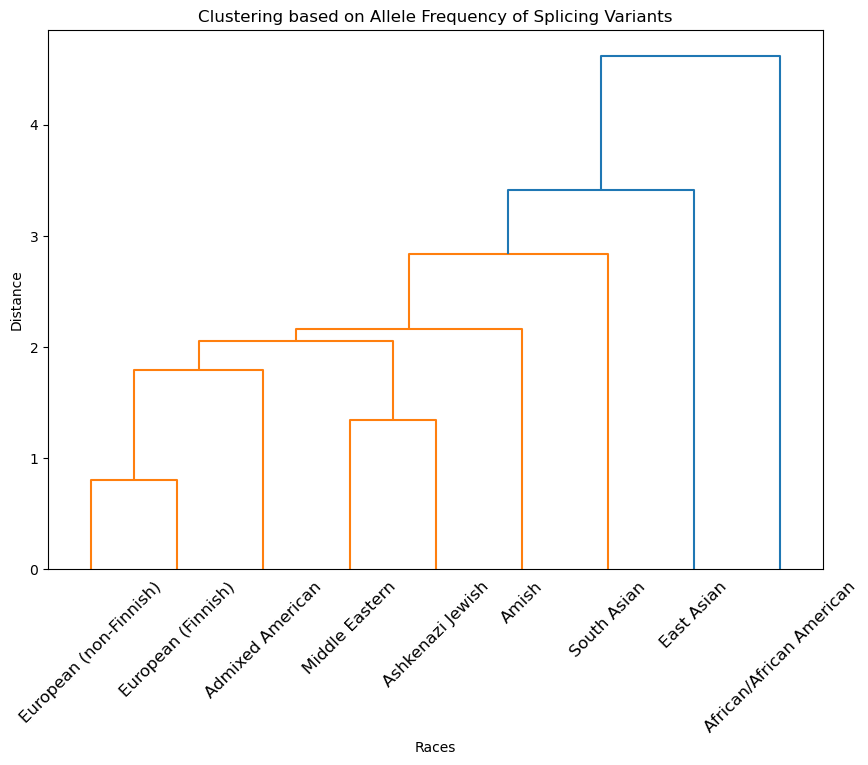

In [30]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'Middle Eastern', 'East Asian', 'South Asian']

# Example DataFrame creation
data = {
    x: merged_df["Allele Frequency " + x] for x in colnames
}
df = pd.DataFrame(data)

df = df.fillna(0)

# Calculate hierarchical clustering
linkage_matrix = linkage(df.transpose(), method='average')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=df.columns, orientation='top', distance_sort='descending')
plt.title('Clustering based on Allele Frequency of Splicing Variants')
plt.xlabel('Races')
plt.ylabel('Distance')
plt.xticks(rotation=45)
plt.show()


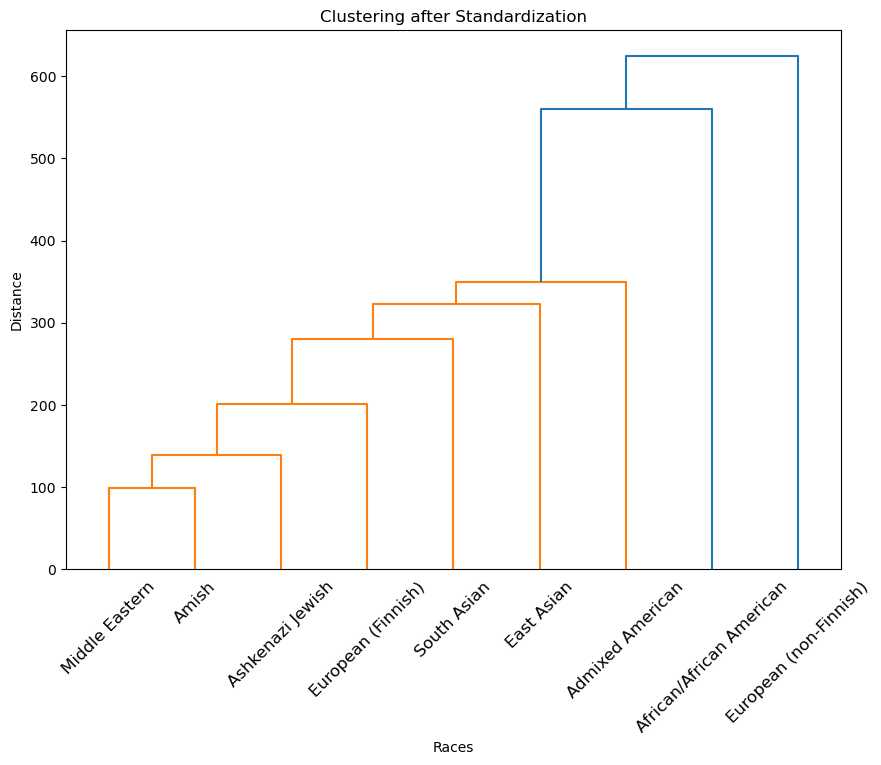

In [40]:
from sklearn.preprocessing import StandardScaler

# Example DataFrame creation
data = {
    x: merged_df["Allele Frequency " + x] for x in colnames
}
df = pd.DataFrame(data)

df = df.fillna(0)

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.T)  # Transpose to cluster populations

# Perform hierarchical clustering on scaled data
linkage_matrix_scaled = linkage(df_scaled, method='average')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix_scaled, labels=df.columns, orientation='top', distance_sort='descending')
plt.title('Clustering after Standardization')
plt.xlabel('Races')
plt.ylabel('Distance')
plt.xticks(rotation=45)
plt.show()


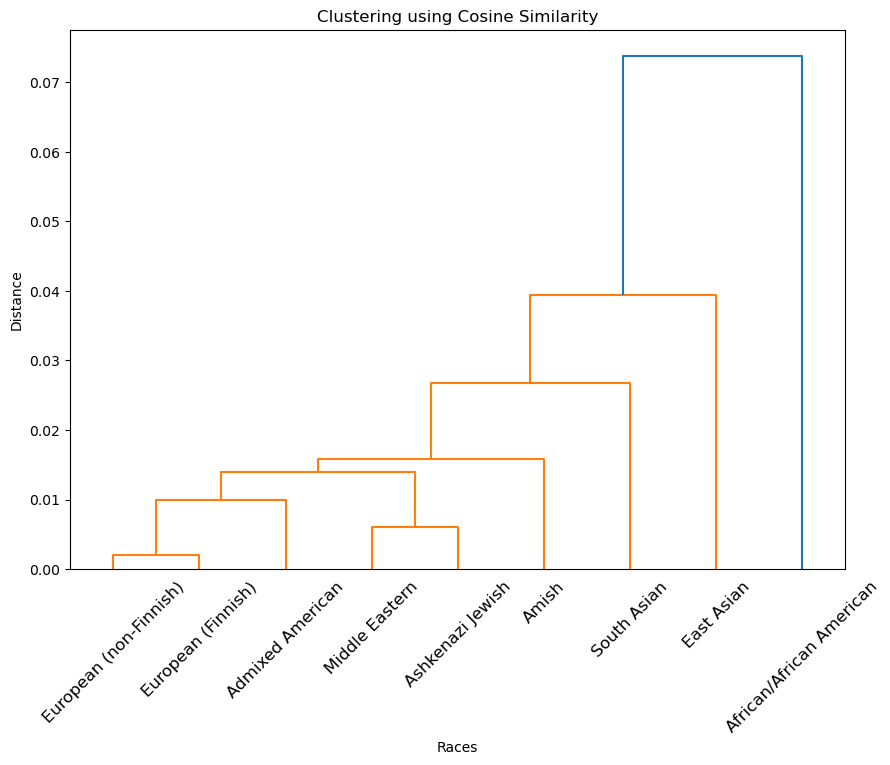

In [42]:
from scipy.spatial.distance import pdist

# Example DataFrame creation
data = {
    x: merged_df["Allele Frequency " + x] for x in colnames
}
df = pd.DataFrame(data)

df = df.fillna(0)

# Compute the distance matrix using cosine similarity
distance_matrix = pdist(df.T, metric='cosine')

# Perform hierarchical clustering using cosine distance
linkage_matrix_cosine = linkage(distance_matrix, method='average')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix_cosine, labels=df.columns, orientation='top', distance_sort='descending')
plt.title('Clustering using Cosine Similarity')
plt.xlabel('Races')
plt.ylabel('Distance')
plt.xticks(rotation=45)
plt.show()


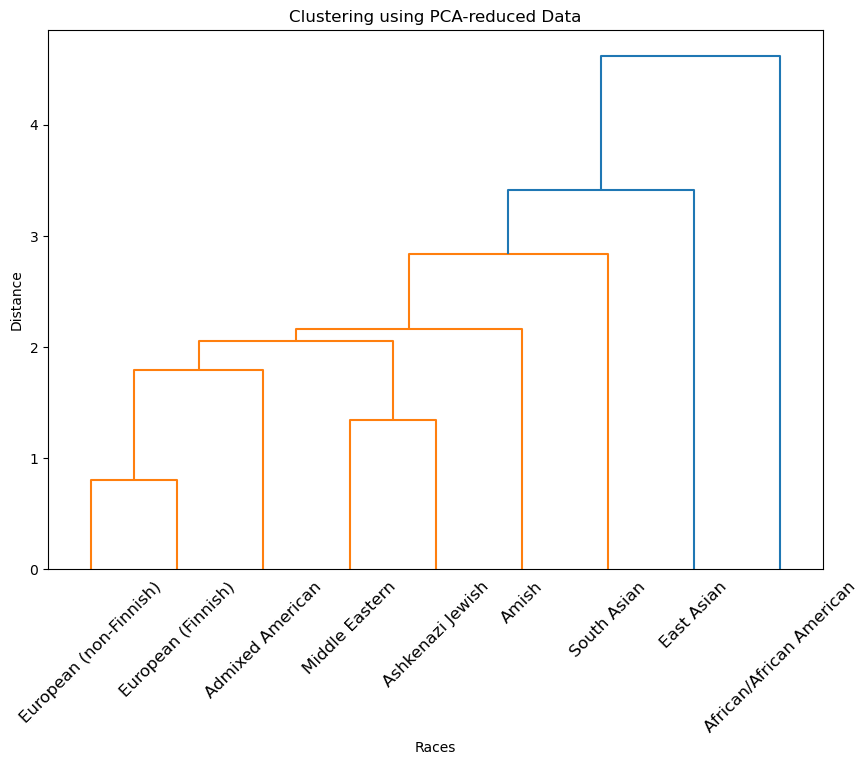

In [50]:
from sklearn.decomposition import PCA

# Example DataFrame creation
data = {
    x: merged_df["Allele Frequency " + x] for x in colnames
}
df = pd.DataFrame(data)

df = df.fillna(0)

# Reduce the data to 2 or 3 principal components
pca = PCA(n_components=8)
df_pca = pca.fit_transform(df.T)

# Perform hierarchical clustering on the PCA-reduced data
linkage_matrix_pca = linkage(df_pca, method='average')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix_pca, labels=df.columns, orientation='top', distance_sort='descending')
plt.title('Clustering using PCA-reduced Data')
plt.xlabel('Races')
plt.ylabel('Distance')
plt.xticks(rotation=45)
plt.show()



<Figure size 900x600 with 0 Axes>

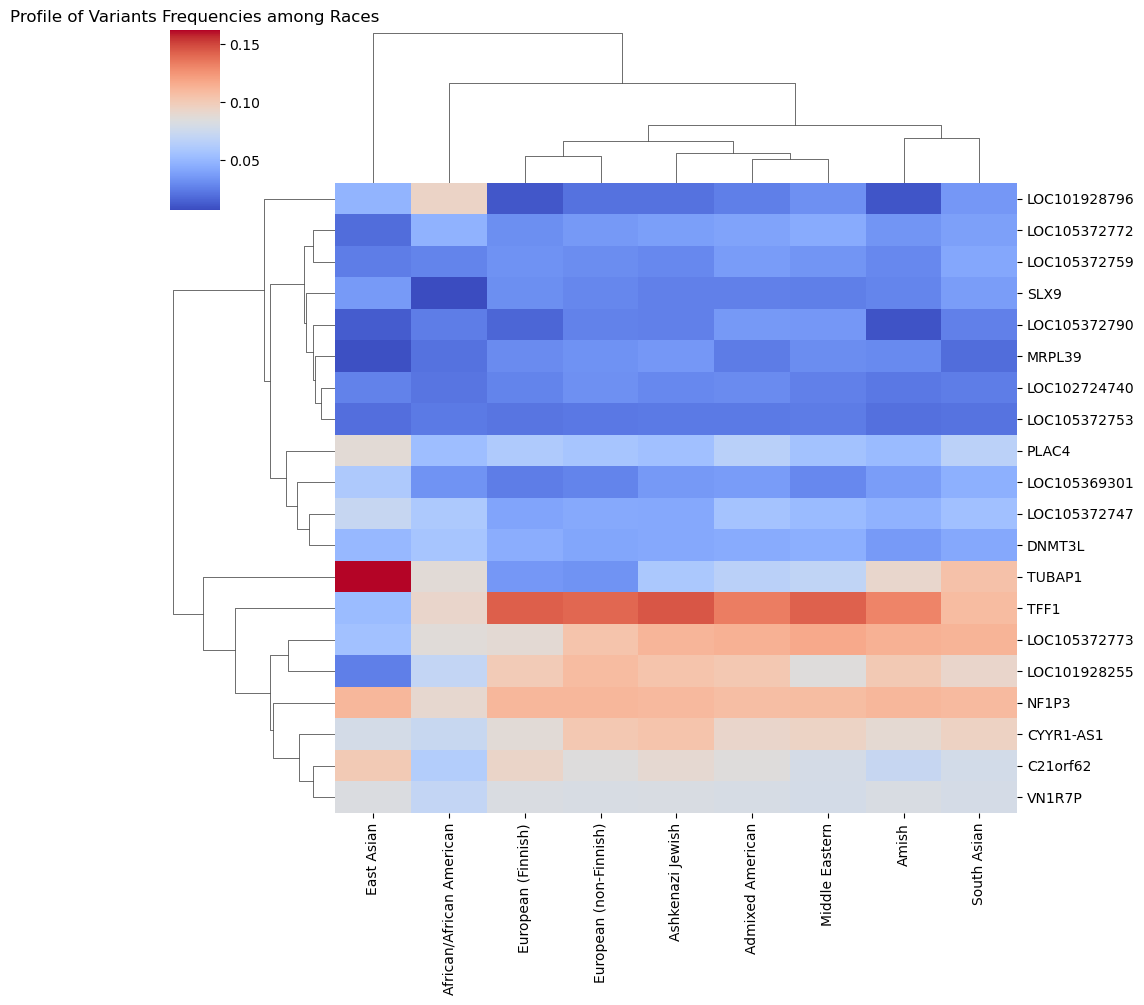

In [64]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'Middle Eastern', 'East Asian', 'South Asian']


genenames = gnom_df_first_occurrence[gnom_df_first_occurrence['Chromosome'] == 'chr22']['Gene'].unique()

# Example DataFrame creation
data = {
    x: [gnom_df_first_occurrence[gnom_df_first_occurrence['Gene'] == y]["Allele Frequency " + x].mean() for y in genenames] for x in colnames
}
df = pd.DataFrame(data)

df = df.set_index(genenames)


df = df.fillna(0)


# Calculate the mean allele frequency for each row
row_means = df.mean(axis=1)

# Step 1: Select the top 20 genes with the highest mean allele frequency
top_20_genes = row_means.nlargest(20).index

# Step 2: Subset the original dataframe 'df' to keep only the rows corresponding to the top 20 genes
filtered_df = df.loc[top_20_genes]



# Create a clustermap using seaborn
plt.figure(figsize=(9, 6))
sns.clustermap(filtered_df, cmap='coolwarm', method='average', metric='euclidean', annot=False)


# Set labels for the plot
plt.title('Profile of Variants Frequencies among Races')
plt.show()

<Figure size 900x600 with 0 Axes>

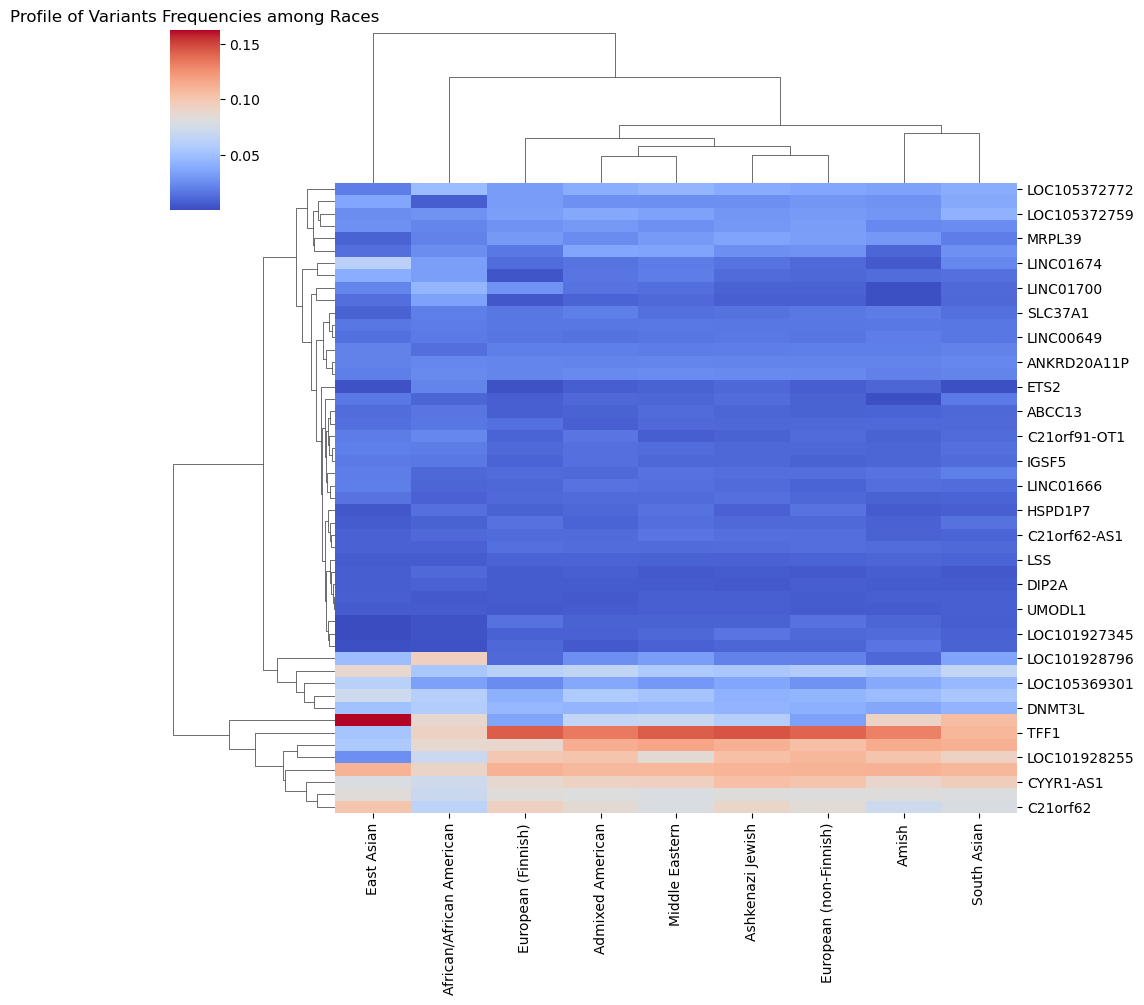

In [7]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'Middle Eastern', 'East Asian', 'South Asian']


genenames = gnom_df_first_occurrence[gnom_df_first_occurrence['Chromosome'] == 'chr21']['Gene'].unique()

# Example DataFrame creation
data = {
    x: [gnom_df_first_occurrence[gnom_df_first_occurrence['Gene'] == y]["Allele Frequency " + x].mean() for y in genenames] for x in colnames
}
df = pd.DataFrame(data)

df = df.set_index(genenames)


df = df.fillna(0)


# Calculate the mean allele frequency for each row
row_means = df.mean(axis=1)

# Step 1: Select the top 20 genes with the highest mean allele frequency
top_20_genes = row_means.nlargest(20).index

# Step 2: Subset the original dataframe 'df' to keep only the rows corresponding to the top 20 genes
filtered_df = df.loc[top_20_genes]



# Create a clustermap using seaborn
plt.figure(figsize=(9, 6))
sns.clustermap(filtered_df, cmap='coolwarm', method='average', metric='euclidean', annot=False)


# Set labels for the plot
plt.title('Profile of Variants Frequencies among Races')
plt.show()

<Figure size 900x600 with 0 Axes>

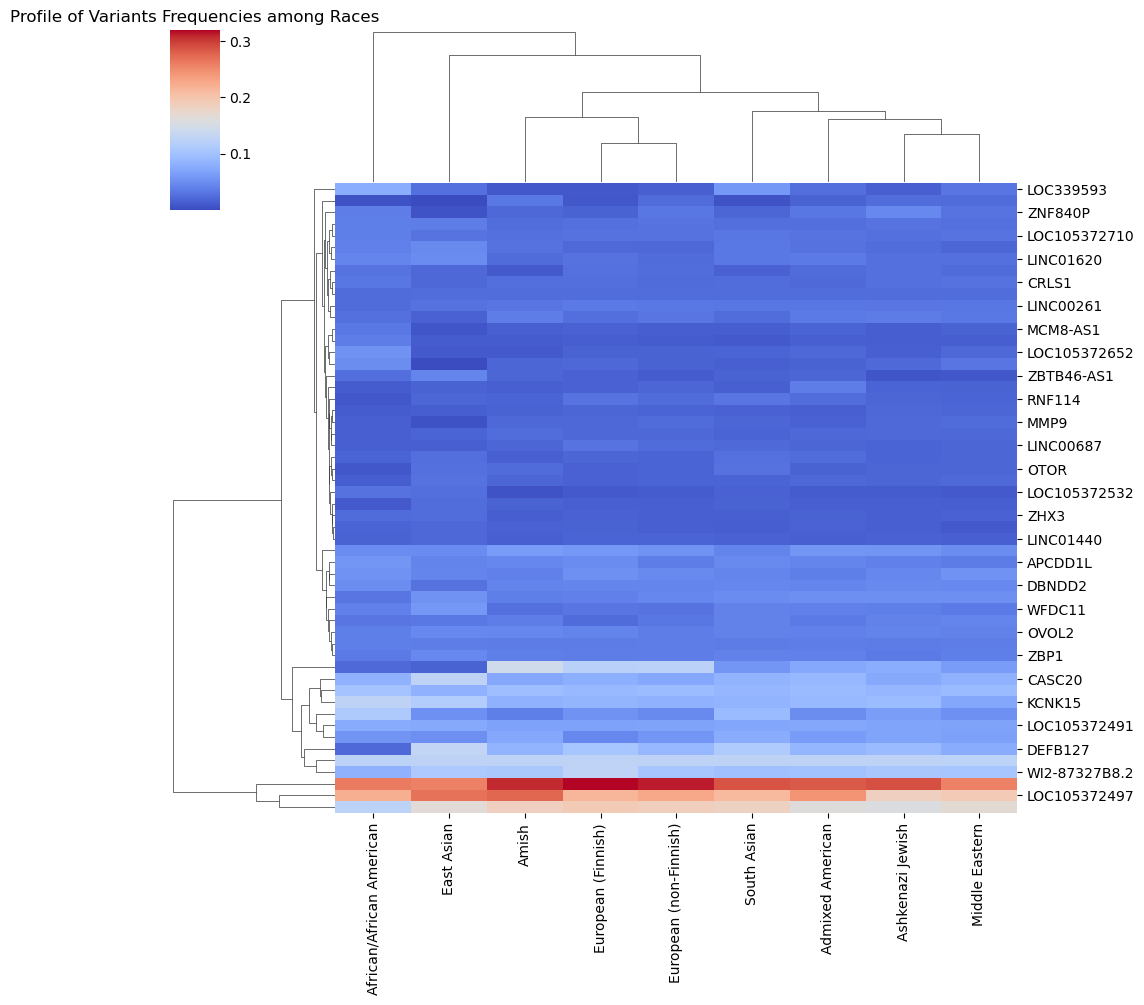

In [6]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'Middle Eastern', 'East Asian', 'South Asian']


genenames = gnom_df_first_occurrence[gnom_df_first_occurrence['Chromosome'] == 'chr20']['Gene'].unique()

# Example DataFrame creation
data = {
    x: [gnom_df_first_occurrence[gnom_df_first_occurrence['Gene'] == y]["Allele Frequency " + x].mean() for y in genenames] for x in colnames
}
df = pd.DataFrame(data)

df = df.set_index(genenames)


df = df.fillna(0)


# Calculate the mean allele frequency for each row
row_means = df.mean(axis=1)

# Step 1: Select the top 20 genes with the highest mean allele frequency
top_20_genes = row_means.nlargest(20).index

# Step 2: Subset the original dataframe 'df' to keep only the rows corresponding to the top 20 genes
filtered_df = df.loc[top_20_genes]



# Create a clustermap using seaborn
plt.figure(figsize=(9, 6))
sns.clustermap(filtered_df, cmap='coolwarm', method='average', metric='euclidean', annot=False)


# Set labels for the plot
plt.title('Profile of Variants Frequencies among Races')
plt.show()

<Figure size 900x600 with 0 Axes>

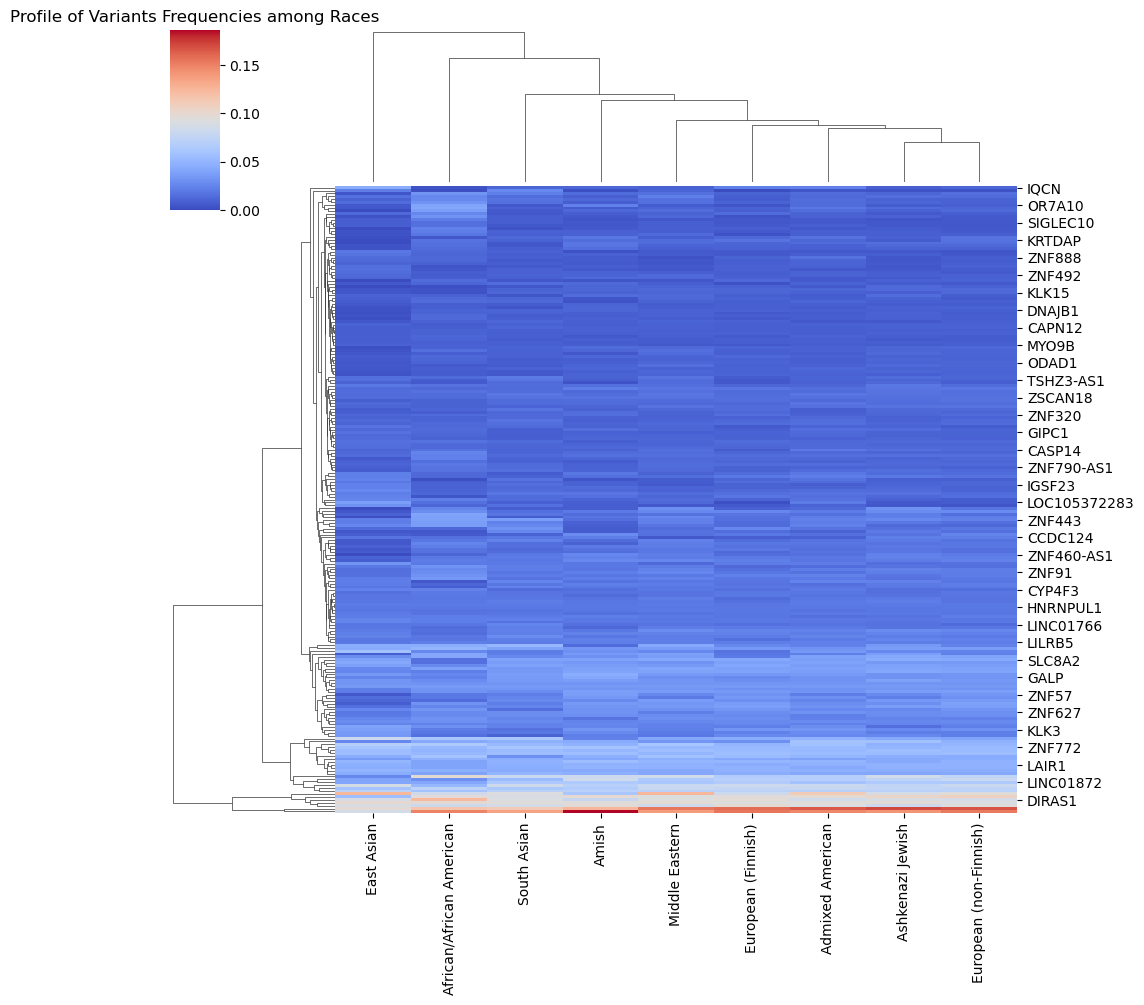

In [9]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'Middle Eastern', 'East Asian', 'South Asian']


genenames = gnom_df_first_occurrence[gnom_df_first_occurrence['Chromosome'] == 'chr19']['Gene'].unique()

# Example DataFrame creation
data = {
    x: [gnom_df_first_occurrence[gnom_df_first_occurrence['Gene'] == y]["Allele Frequency " + x].mean() for y in genenames] for x in colnames
}
df = pd.DataFrame(data)

df = df.set_index(genenames)


df = df.fillna(0)


# Calculate the mean allele frequency for each row
row_means = df.mean(axis=1)

# Step 1: Select the top 20 genes with the highest mean allele frequency
top_20_genes = row_means.nlargest(20).index

# Step 2: Subset the original dataframe 'df' to keep only the rows corresponding to the top 20 genes
filtered_df = df.loc[top_20_genes]



# Create a clustermap using seaborn
plt.figure(figsize=(9, 6))
sns.clustermap(filtered_df, cmap='coolwarm', method='average', metric='euclidean', annot=False)


# Set labels for the plot
plt.title('Profile of Variants Frequencies among Races')
plt.show()

<Figure size 900x600 with 0 Axes>

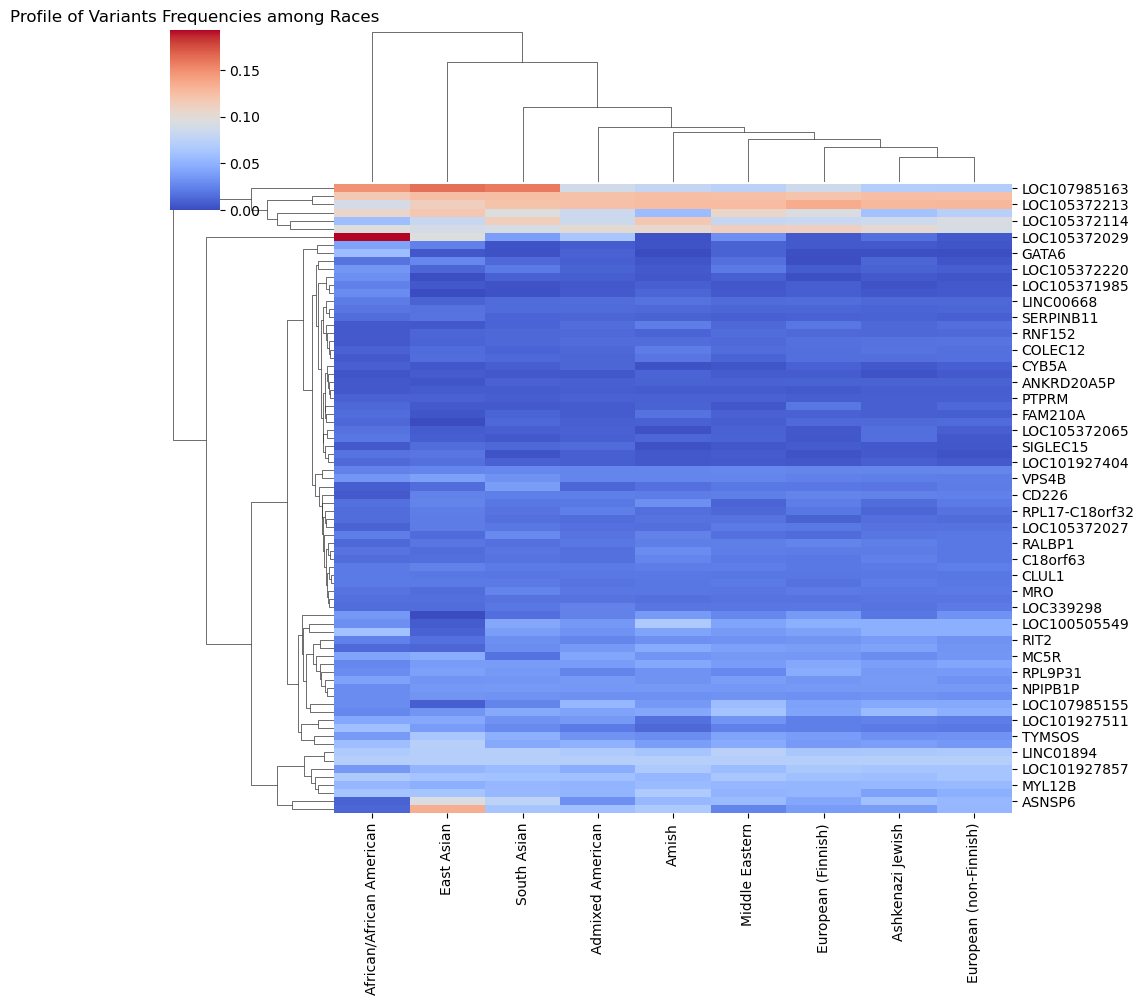

In [10]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'Middle Eastern', 'East Asian', 'South Asian']


genenames = gnom_df_first_occurrence[gnom_df_first_occurrence['Chromosome'] == 'chr18']['Gene'].unique()

# Example DataFrame creation
data = {
    x: [gnom_df_first_occurrence[gnom_df_first_occurrence['Gene'] == y]["Allele Frequency " + x].mean() for y in genenames] for x in colnames
}
df = pd.DataFrame(data)

df = df.set_index(genenames)


df = df.fillna(0)


# Calculate the mean allele frequency for each row
row_means = df.mean(axis=1)

# Step 1: Select the top 20 genes with the highest mean allele frequency
top_20_genes = row_means.nlargest(20).index

# Step 2: Subset the original dataframe 'df' to keep only the rows corresponding to the top 20 genes
filtered_df = df.loc[top_20_genes]



# Create a clustermap using seaborn
plt.figure(figsize=(9, 6))
sns.clustermap(filtered_df, cmap='coolwarm', method='average', metric='euclidean', annot=False)


# Set labels for the plot
plt.title('Profile of Variants Frequencies among Races')
plt.show()

<Figure size 900x600 with 0 Axes>

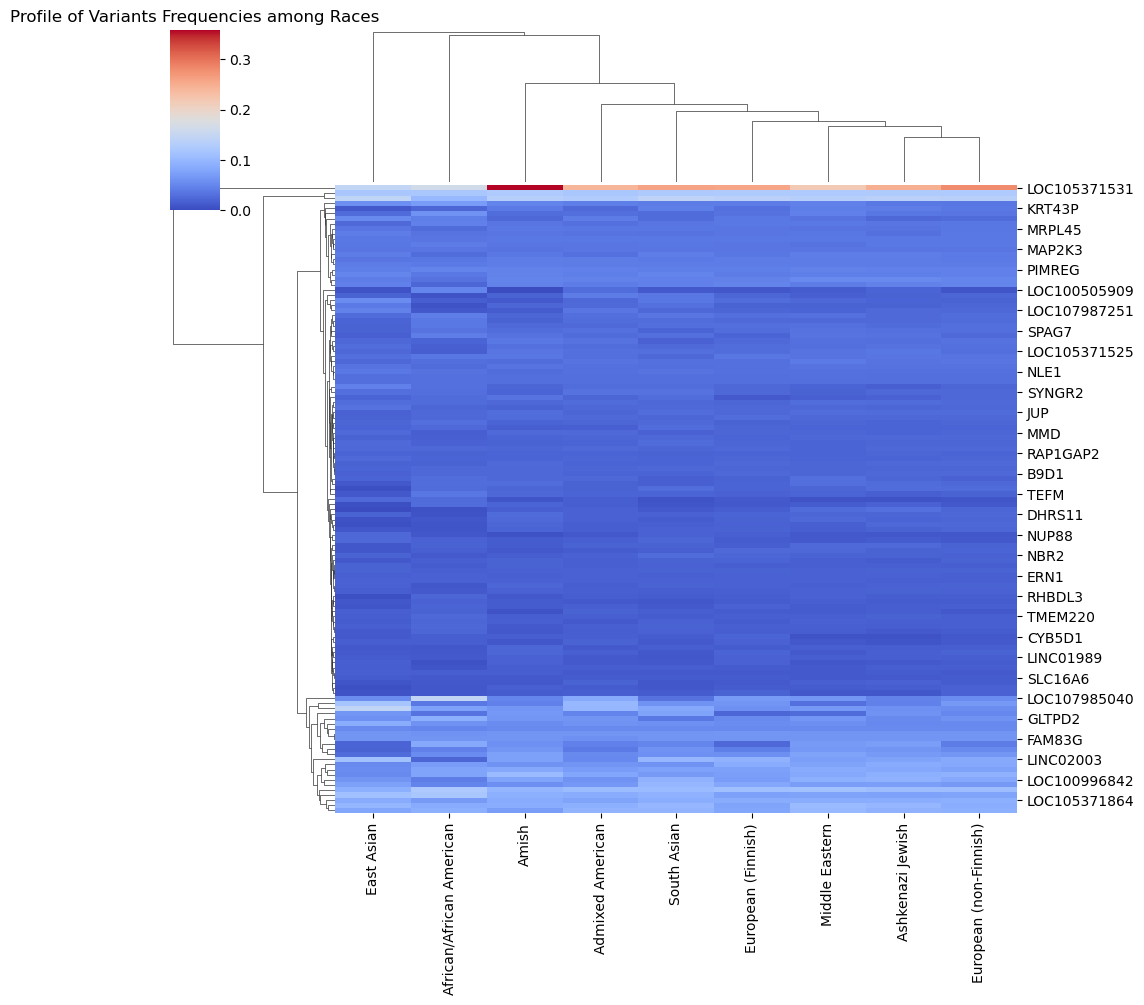

In [19]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'Middle Eastern', 'East Asian', 'South Asian']


genenames = gnom_df_first_occurrence[gnom_df_first_occurrence['Chromosome'] == 'chr17']['Gene'].unique()

# Example DataFrame creation
data = {
    x: [gnom_df_first_occurrence[gnom_df_first_occurrence['Gene'] == y]["Allele Frequency " + x].mean() for y in genenames] for x in colnames
}
df = pd.DataFrame(data)

df = df.set_index(genenames)


df = df.fillna(0)


# Calculate the mean allele frequency for each row
row_means = df.mean(axis=1)

# Step 1: Select the top 20 genes with the highest mean allele frequency
top_20_genes = row_means.nlargest(20).index

# Step 2: Subset the original dataframe 'df' to keep only the rows corresponding to the top 20 genes
filtered_df = df.loc[top_20_genes]



# Create a clustermap using seaborn
plt.figure(figsize=(9, 6))
sns.clustermap(filtered_df, cmap='coolwarm', method='average', metric='euclidean', annot=False)


# Set labels for the plot
plt.title('Profile of Variants Frequencies among Races')
plt.show()

<Figure size 900x600 with 0 Axes>

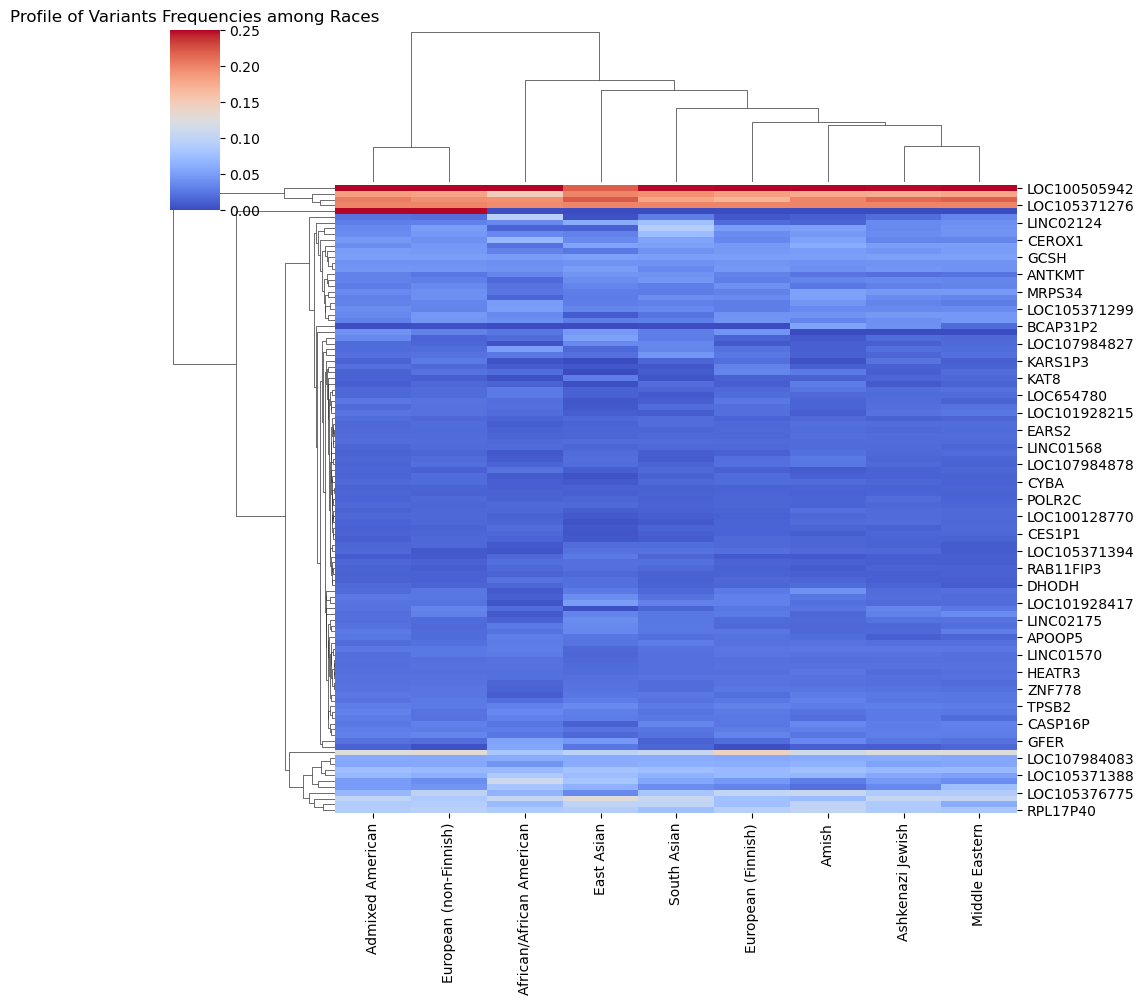

In [20]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'Middle Eastern', 'East Asian', 'South Asian']


genenames = gnom_df_first_occurrence[gnom_df_first_occurrence['Chromosome'] == 'chr16']['Gene'].unique()

# Example DataFrame creation
data = {
    x: [gnom_df_first_occurrence[gnom_df_first_occurrence['Gene'] == y]["Allele Frequency " + x].mean() for y in genenames] for x in colnames
}
df = pd.DataFrame(data)

df = df.set_index(genenames)


df = df.fillna(0)


# Calculate the mean allele frequency for each row
row_means = df.mean(axis=1)

# Step 1: Select the top 20 genes with the highest mean allele frequency
top_20_genes = row_means.nlargest(20).index

# Step 2: Subset the original dataframe 'df' to keep only the rows corresponding to the top 20 genes
filtered_df = df.loc[top_20_genes]



# Create a clustermap using seaborn
plt.figure(figsize=(9, 6))
sns.clustermap(filtered_df, cmap='coolwarm', method='average', metric='euclidean', annot=False)


# Set labels for the plot
plt.title('Profile of Variants Frequencies among Races')
plt.show()

<Figure size 900x600 with 0 Axes>

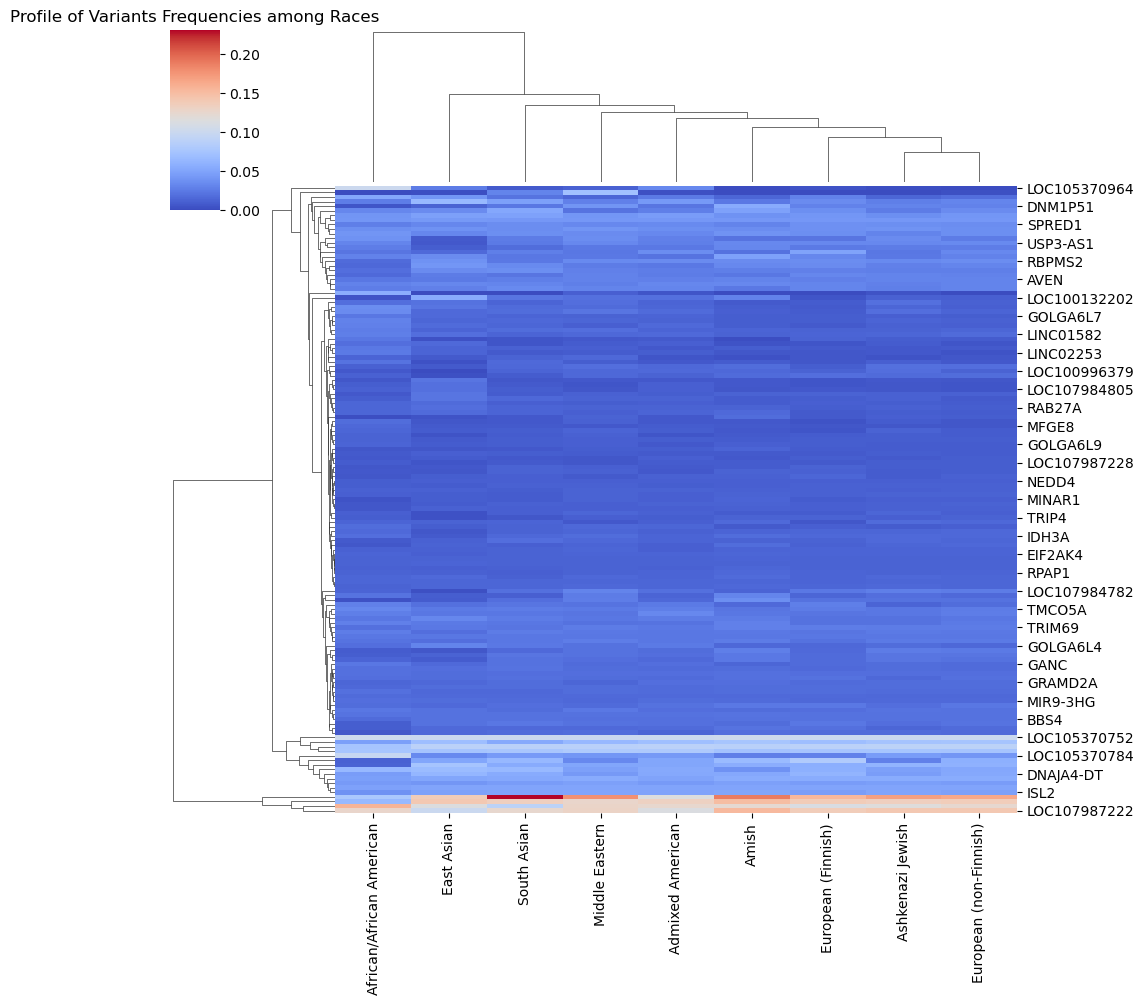

In [21]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'Middle Eastern', 'East Asian', 'South Asian']


genenames = gnom_df_first_occurrence[gnom_df_first_occurrence['Chromosome'] == 'chr15']['Gene'].unique()

# Example DataFrame creation
data = {
    x: [gnom_df_first_occurrence[gnom_df_first_occurrence['Gene'] == y]["Allele Frequency " + x].mean() for y in genenames] for x in colnames
}
df = pd.DataFrame(data)

df = df.set_index(genenames)


df = df.fillna(0)


# Calculate the mean allele frequency for each row
row_means = df.mean(axis=1)

# Step 1: Select the top 20 genes with the highest mean allele frequency
top_20_genes = row_means.nlargest(20).index

# Step 2: Subset the original dataframe 'df' to keep only the rows corresponding to the top 20 genes
filtered_df = df.loc[top_20_genes]



# Create a clustermap using seaborn
plt.figure(figsize=(9, 6))
sns.clustermap(filtered_df, cmap='coolwarm', method='average', metric='euclidean', annot=False)


# Set labels for the plot
plt.title('Profile of Variants Frequencies among Races')
plt.show()

<Figure size 900x600 with 0 Axes>

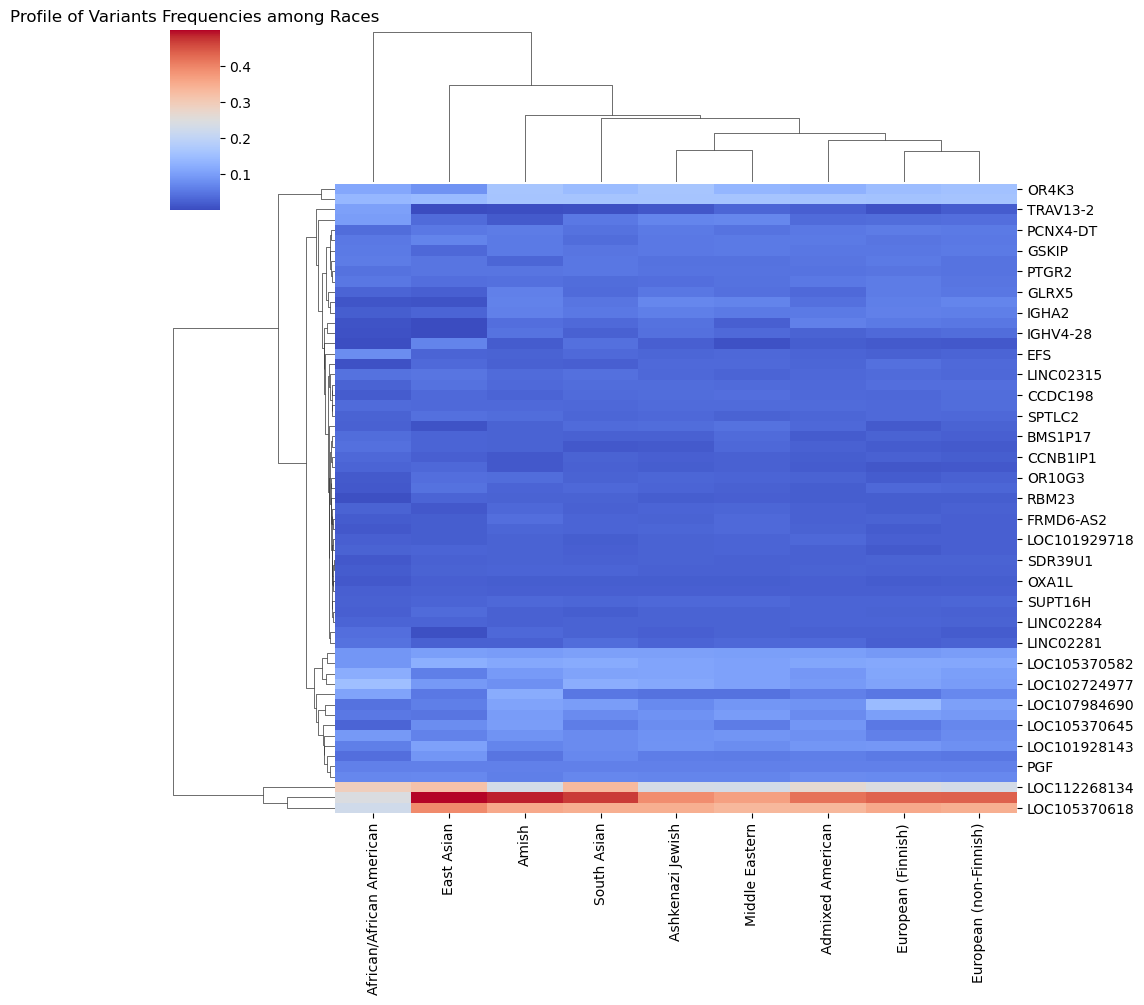

In [23]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'Middle Eastern', 'East Asian', 'South Asian']


genenames = gnom_df_first_occurrence[gnom_df_first_occurrence['Chromosome'] == 'chr14']['Gene'].unique()

# Example DataFrame creation
data = {
    x: [gnom_df_first_occurrence[gnom_df_first_occurrence['Gene'] == y]["Allele Frequency " + x].mean() for y in genenames] for x in colnames
}
df = pd.DataFrame(data)

df = df.set_index(genenames)


df = df.fillna(0)


# Calculate the mean allele frequency for each row
row_means = df.mean(axis=1)

# Step 1: Select the top 20 genes with the highest mean allele frequency
top_20_genes = row_means.nlargest(20).index

# Step 2: Subset the original dataframe 'df' to keep only the rows corresponding to the top 20 genes
filtered_df = df.loc[top_20_genes]



# Create a clustermap using seaborn
plt.figure(figsize=(9, 6))
sns.clustermap(filtered_df, cmap='coolwarm', method='average', metric='euclidean', annot=False)


# Set labels for the plot
plt.title('Profile of Variants Frequencies among Races')
plt.show()

<Figure size 900x600 with 0 Axes>

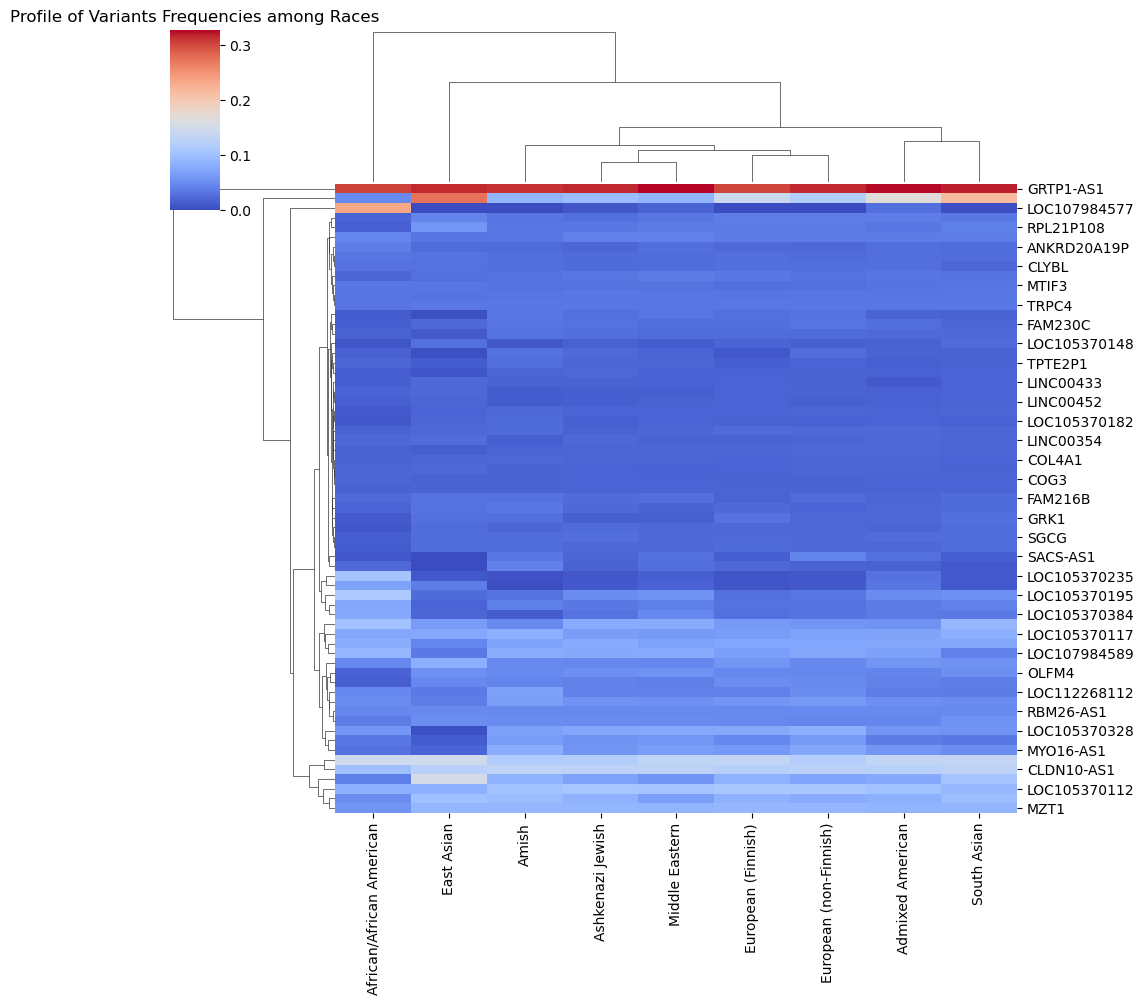

In [24]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'Middle Eastern', 'East Asian', 'South Asian']


genenames = gnom_df_first_occurrence[gnom_df_first_occurrence['Chromosome'] == 'chr13']['Gene'].unique()

# Example DataFrame creation
data = {
    x: [gnom_df_first_occurrence[gnom_df_first_occurrence['Gene'] == y]["Allele Frequency " + x].mean() for y in genenames] for x in colnames
}
df = pd.DataFrame(data)

df = df.set_index(genenames)


df = df.fillna(0)


# Calculate the mean allele frequency for each row
row_means = df.mean(axis=1)

# Step 1: Select the top 20 genes with the highest mean allele frequency
top_20_genes = row_means.nlargest(20).index

# Step 2: Subset the original dataframe 'df' to keep only the rows corresponding to the top 20 genes
filtered_df = df.loc[top_20_genes]



# Create a clustermap using seaborn
plt.figure(figsize=(9, 6))
sns.clustermap(filtered_df, cmap='coolwarm', method='average', metric='euclidean', annot=False)


# Set labels for the plot
plt.title('Profile of Variants Frequencies among Races')
plt.show()

<Figure size 900x600 with 0 Axes>

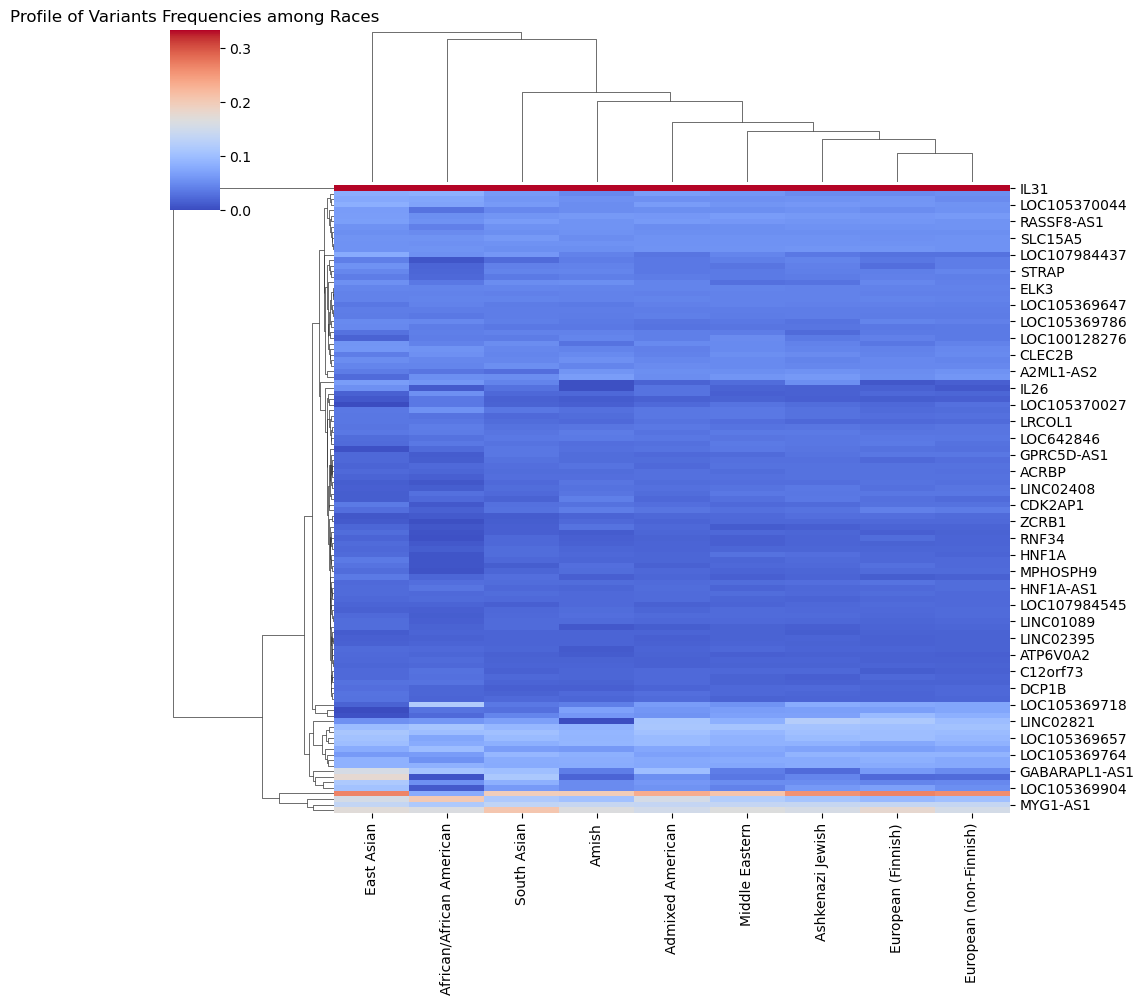

In [25]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'Middle Eastern', 'East Asian', 'South Asian']


genenames = gnom_df_first_occurrence[gnom_df_first_occurrence['Chromosome'] == 'chr12']['Gene'].unique()

# Example DataFrame creation
data = {
    x: [gnom_df_first_occurrence[gnom_df_first_occurrence['Gene'] == y]["Allele Frequency " + x].mean() for y in genenames] for x in colnames
}
df = pd.DataFrame(data)

df = df.set_index(genenames)


df = df.fillna(0)


# Calculate the mean allele frequency for each row
row_means = df.mean(axis=1)

# Step 1: Select the top 20 genes with the highest mean allele frequency
top_20_genes = row_means.nlargest(20).index

# Step 2: Subset the original dataframe 'df' to keep only the rows corresponding to the top 20 genes
filtered_df = df.loc[top_20_genes]



# Create a clustermap using seaborn
plt.figure(figsize=(9, 6))
sns.clustermap(filtered_df, cmap='coolwarm', method='average', metric='euclidean', annot=False)


# Set labels for the plot
plt.title('Profile of Variants Frequencies among Races')
plt.show()

<Figure size 900x600 with 0 Axes>

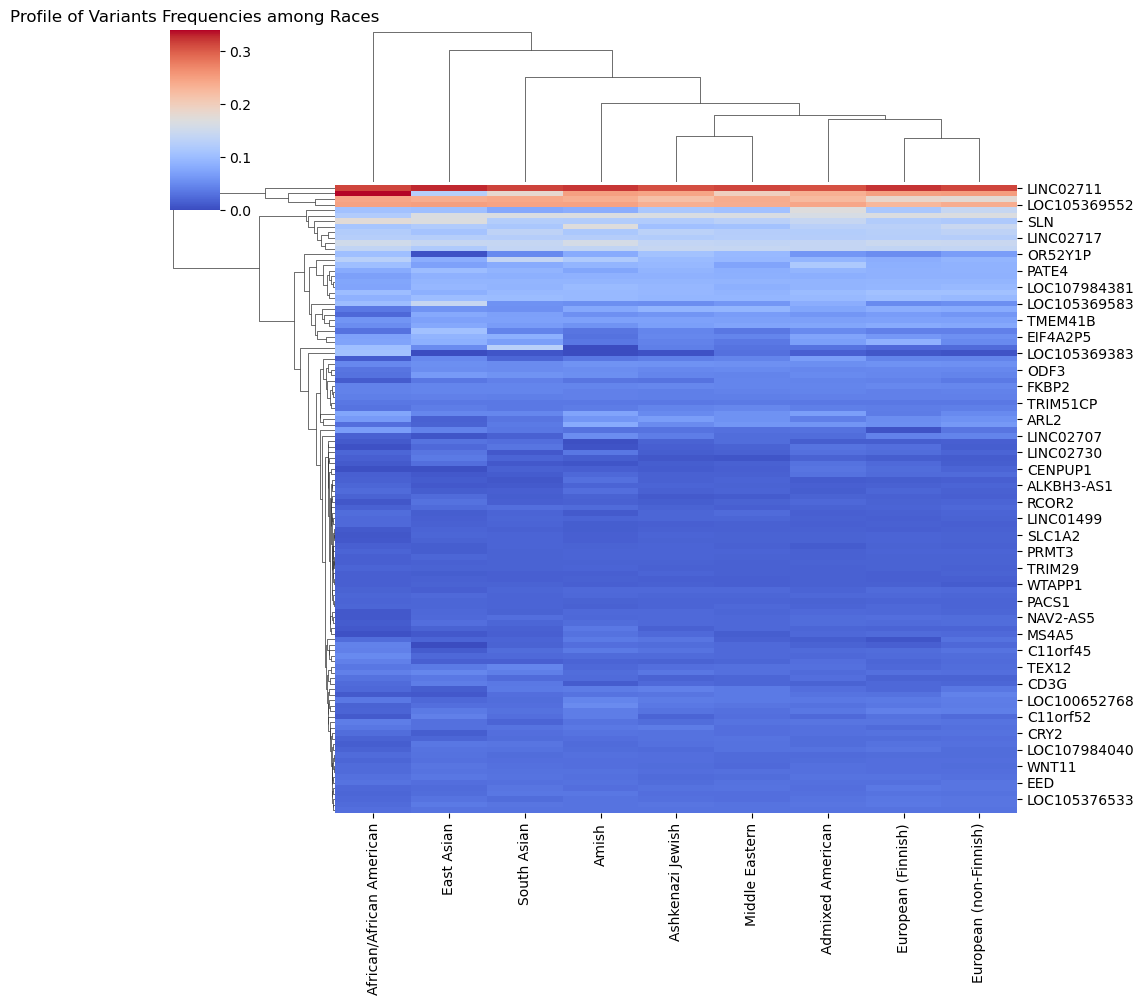

In [26]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'Middle Eastern', 'East Asian', 'South Asian']


genenames = gnom_df_first_occurrence[gnom_df_first_occurrence['Chromosome'] == 'chr11']['Gene'].unique()

# Example DataFrame creation
data = {
    x: [gnom_df_first_occurrence[gnom_df_first_occurrence['Gene'] == y]["Allele Frequency " + x].mean() for y in genenames] for x in colnames
}
df = pd.DataFrame(data)

df = df.set_index(genenames)


df = df.fillna(0)


# Calculate the mean allele frequency for each row
row_means = df.mean(axis=1)

# Step 1: Select the top 20 genes with the highest mean allele frequency
top_20_genes = row_means.nlargest(20).index

# Step 2: Subset the original dataframe 'df' to keep only the rows corresponding to the top 20 genes
filtered_df = df.loc[top_20_genes]



# Create a clustermap using seaborn
plt.figure(figsize=(9, 6))
sns.clustermap(filtered_df, cmap='coolwarm', method='average', metric='euclidean', annot=False)


# Set labels for the plot
plt.title('Profile of Variants Frequencies among Races')
plt.show()

<Figure size 900x600 with 0 Axes>

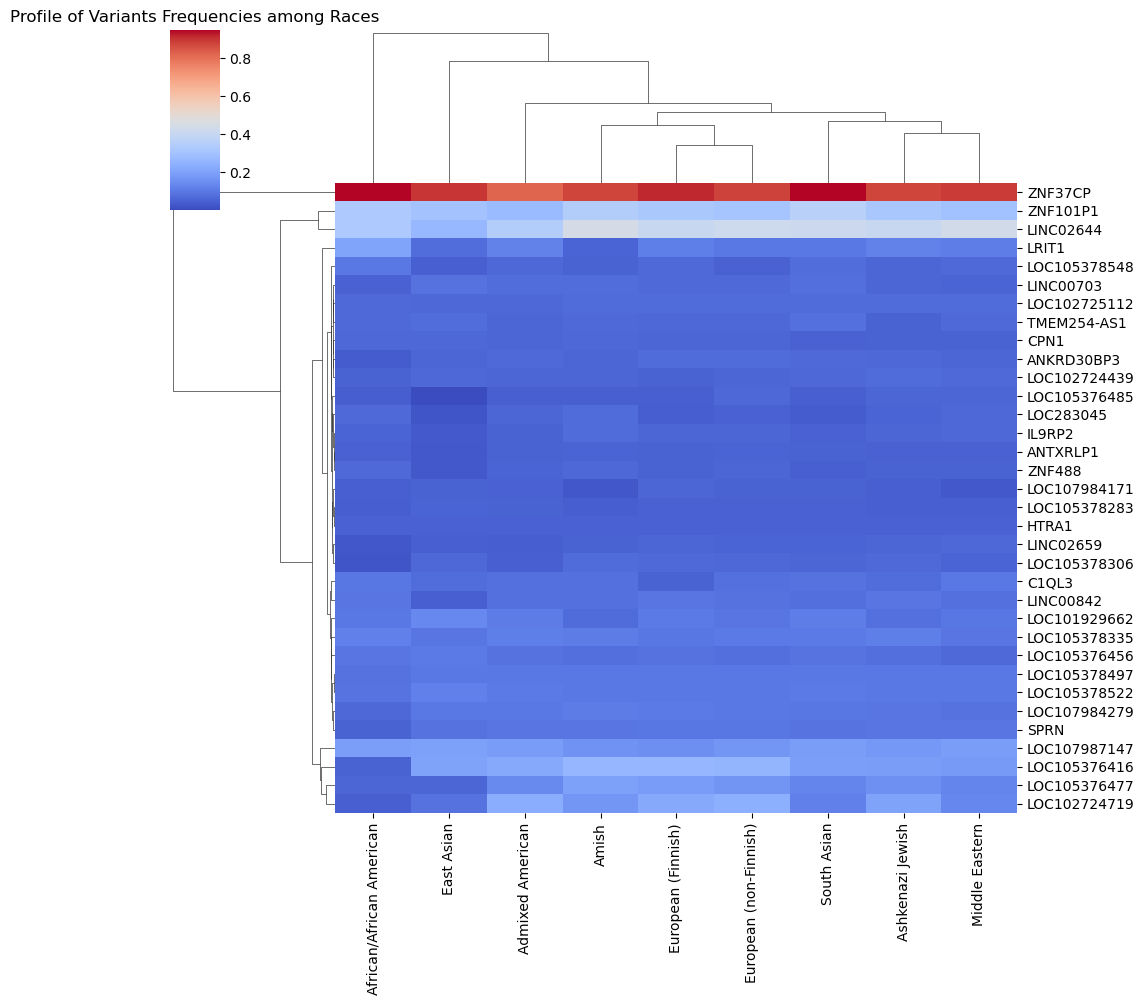

In [27]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'Middle Eastern', 'East Asian', 'South Asian']


genenames = gnom_df_first_occurrence[gnom_df_first_occurrence['Chromosome'] == 'chr10']['Gene'].unique()

# Example DataFrame creation
data = {
    x: [gnom_df_first_occurrence[gnom_df_first_occurrence['Gene'] == y]["Allele Frequency " + x].mean() for y in genenames] for x in colnames
}
df = pd.DataFrame(data)

df = df.set_index(genenames)


df = df.fillna(0)


# Calculate the mean allele frequency for each row
row_means = df.mean(axis=1)

# Step 1: Select the top 20 genes with the highest mean allele frequency
top_20_genes = row_means.nlargest(20).index

# Step 2: Subset the original dataframe 'df' to keep only the rows corresponding to the top 20 genes
filtered_df = df.loc[top_20_genes]



# Create a clustermap using seaborn
plt.figure(figsize=(9, 6))
sns.clustermap(filtered_df, cmap='coolwarm', method='average', metric='euclidean', annot=False)


# Set labels for the plot
plt.title('Profile of Variants Frequencies among Races')
plt.show()

<Figure size 900x600 with 0 Axes>

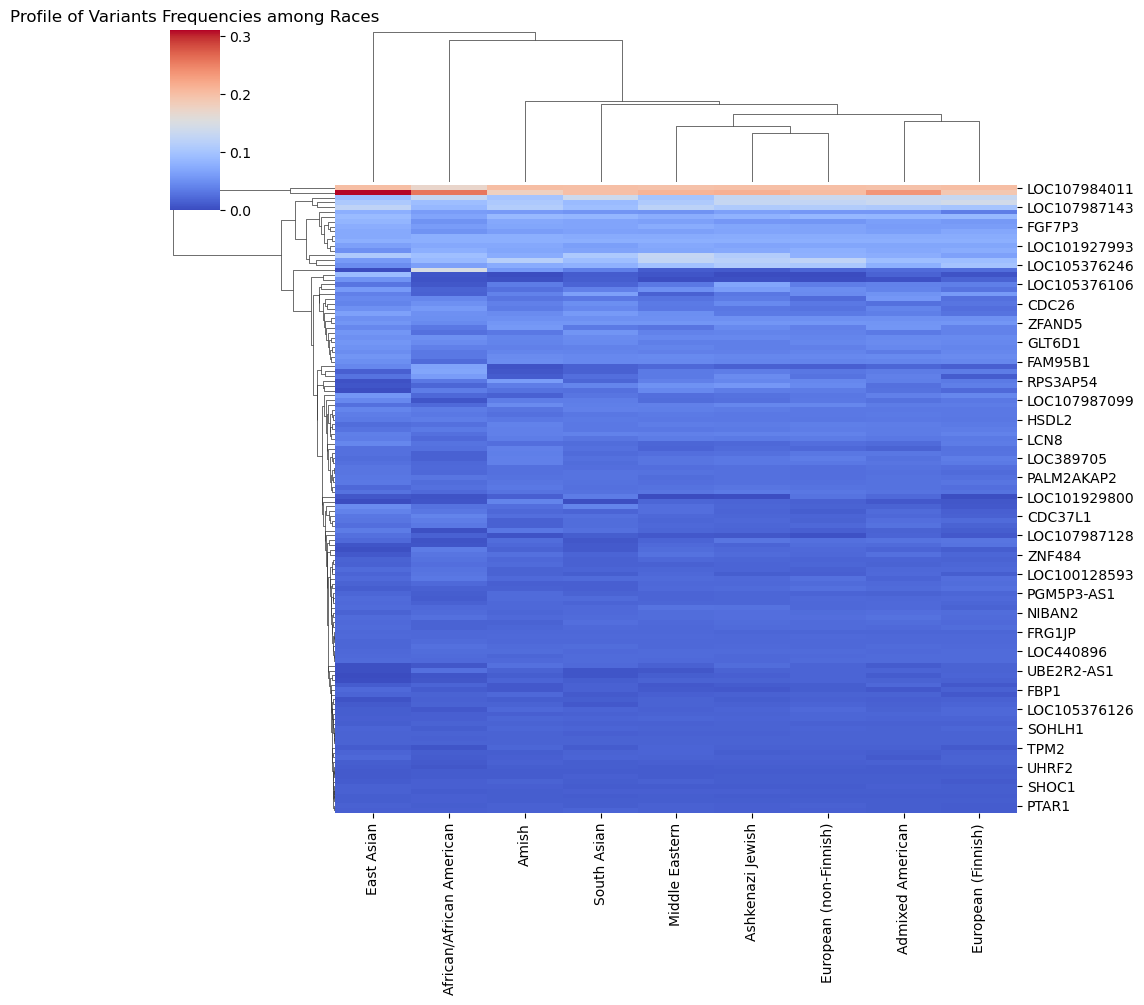

In [28]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'Middle Eastern', 'East Asian', 'South Asian']


genenames = gnom_df_first_occurrence[gnom_df_first_occurrence['Chromosome'] == 'chr9']['Gene'].unique()

# Example DataFrame creation
data = {
    x: [gnom_df_first_occurrence[gnom_df_first_occurrence['Gene'] == y]["Allele Frequency " + x].mean() for y in genenames] for x in colnames
}
df = pd.DataFrame(data)

df = df.set_index(genenames)


df = df.fillna(0)


# Calculate the mean allele frequency for each row
row_means = df.mean(axis=1)

# Step 1: Select the top 20 genes with the highest mean allele frequency
top_20_genes = row_means.nlargest(20).index

# Step 2: Subset the original dataframe 'df' to keep only the rows corresponding to the top 20 genes
filtered_df = df.loc[top_20_genes]



# Create a clustermap using seaborn
plt.figure(figsize=(9, 6))
sns.clustermap(filtered_df, cmap='coolwarm', method='average', metric='euclidean', annot=False)


# Set labels for the plot
plt.title('Profile of Variants Frequencies among Races')
plt.show()

<Figure size 900x600 with 0 Axes>

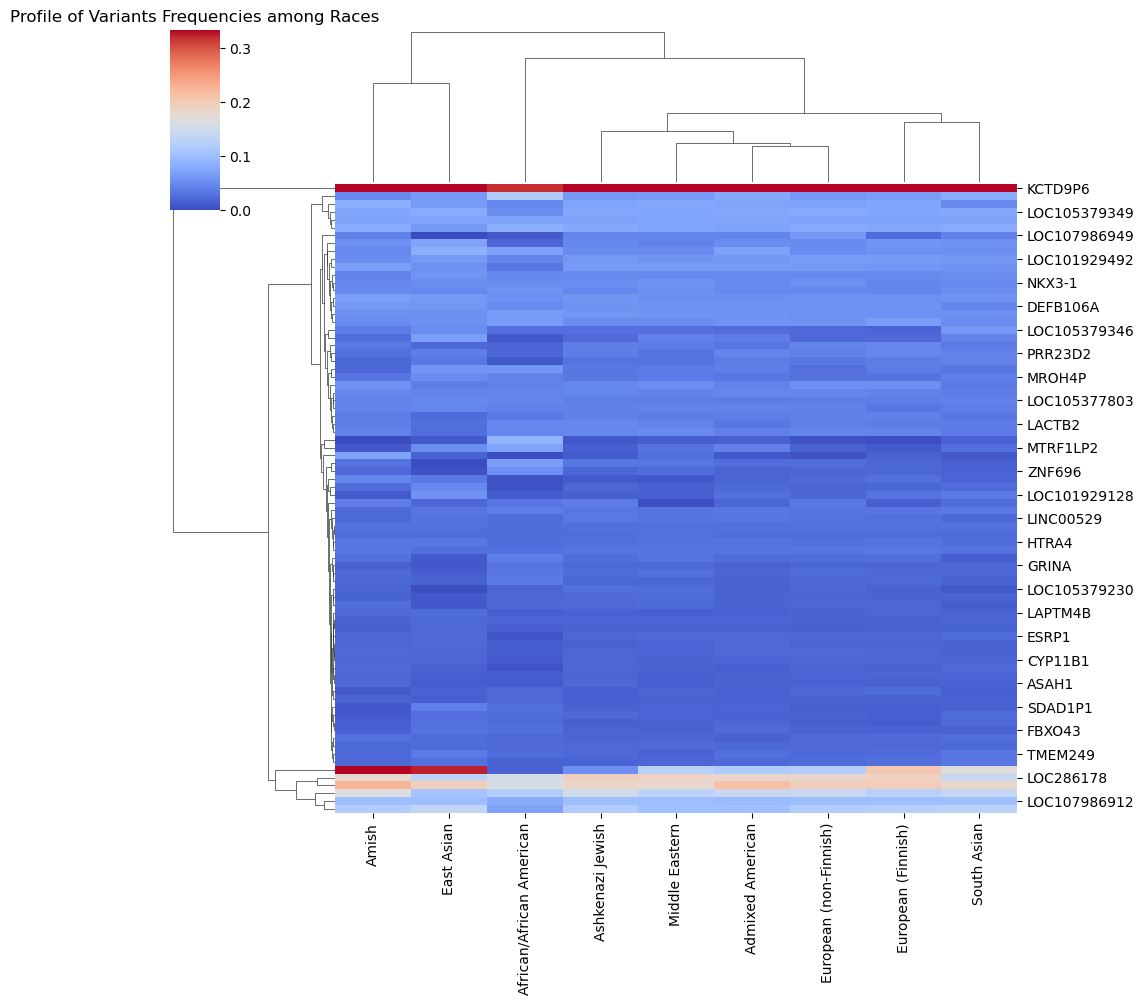

In [29]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'Middle Eastern', 'East Asian', 'South Asian']


genenames = gnom_df_first_occurrence[gnom_df_first_occurrence['Chromosome'] == 'chr8']['Gene'].unique()

# Example DataFrame creation
data = {
    x: [gnom_df_first_occurrence[gnom_df_first_occurrence['Gene'] == y]["Allele Frequency " + x].mean() for y in genenames] for x in colnames
}
df = pd.DataFrame(data)

df = df.set_index(genenames)


df = df.fillna(0)


# Calculate the mean allele frequency for each row
row_means = df.mean(axis=1)

# Step 1: Select the top 20 genes with the highest mean allele frequency
top_20_genes = row_means.nlargest(20).index

# Step 2: Subset the original dataframe 'df' to keep only the rows corresponding to the top 20 genes
filtered_df = df.loc[top_20_genes]



# Create a clustermap using seaborn
plt.figure(figsize=(9, 6))
sns.clustermap(filtered_df, cmap='coolwarm', method='average', metric='euclidean', annot=False)


# Set labels for the plot
plt.title('Profile of Variants Frequencies among Races')
plt.show()

<Figure size 900x600 with 0 Axes>

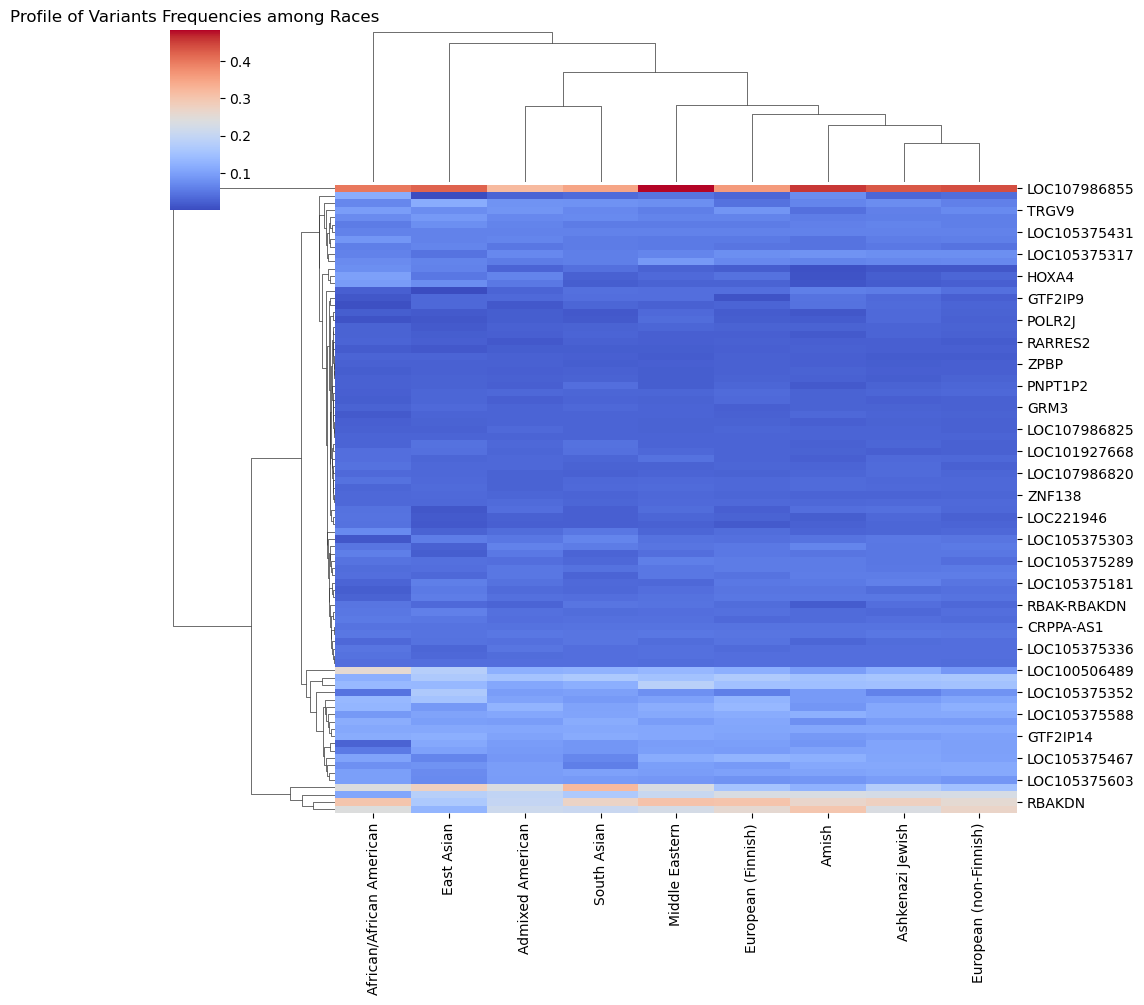

In [30]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'Middle Eastern', 'East Asian', 'South Asian']


genenames = gnom_df_first_occurrence[gnom_df_first_occurrence['Chromosome'] == 'chr7']['Gene'].unique()

# Example DataFrame creation
data = {
    x: [gnom_df_first_occurrence[gnom_df_first_occurrence['Gene'] == y]["Allele Frequency " + x].mean() for y in genenames] for x in colnames
}
df = pd.DataFrame(data)

df = df.set_index(genenames)


df = df.fillna(0)


# Calculate the mean allele frequency for each row
row_means = df.mean(axis=1)

# Step 1: Select the top 20 genes with the highest mean allele frequency
top_20_genes = row_means.nlargest(20).index

# Step 2: Subset the original dataframe 'df' to keep only the rows corresponding to the top 20 genes
filtered_df = df.loc[top_20_genes]



# Create a clustermap using seaborn
plt.figure(figsize=(9, 6))
sns.clustermap(filtered_df, cmap='coolwarm', method='average', metric='euclidean', annot=False)


# Set labels for the plot
plt.title('Profile of Variants Frequencies among Races')
plt.show()

<Figure size 900x600 with 0 Axes>

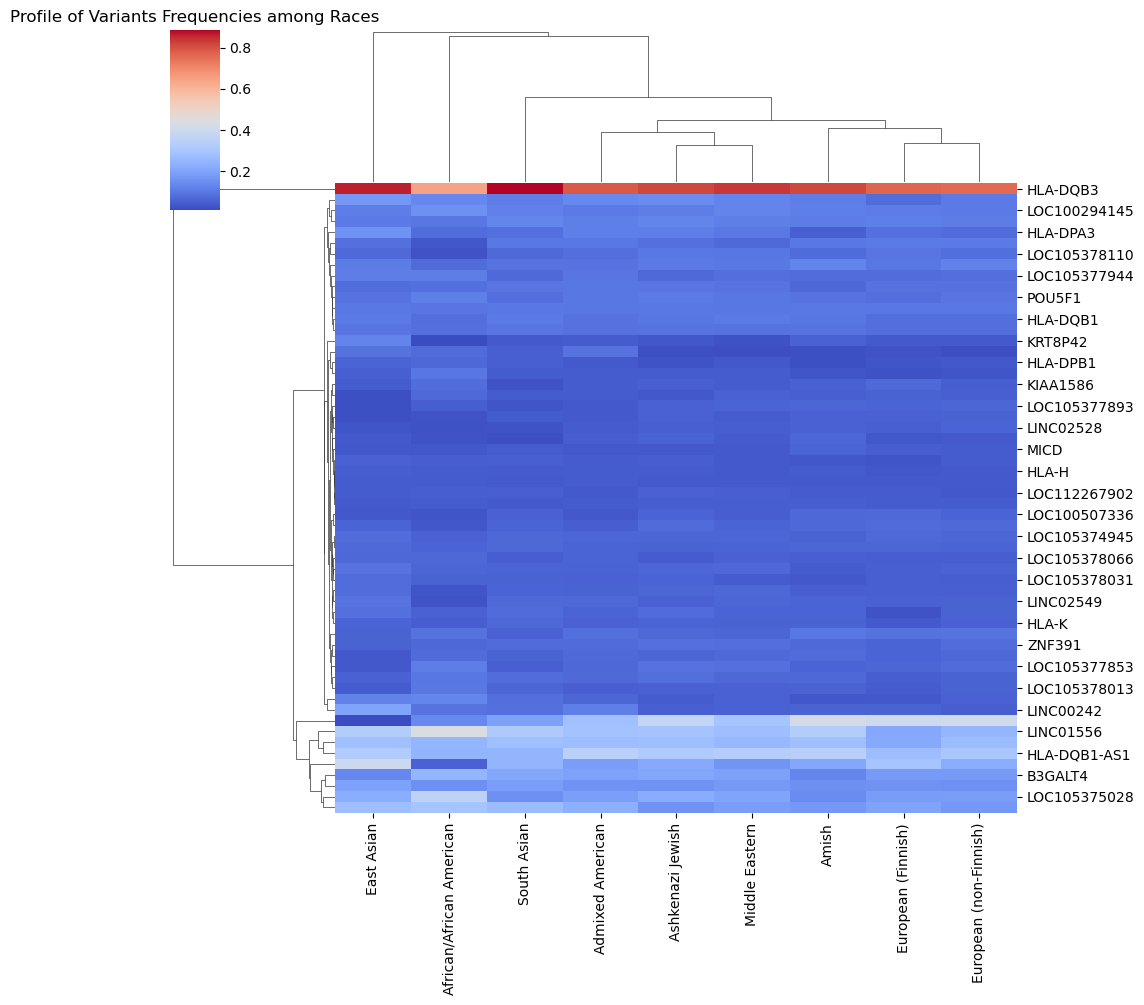

In [31]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'Middle Eastern', 'East Asian', 'South Asian']


genenames = gnom_df_first_occurrence[gnom_df_first_occurrence['Chromosome'] == 'chr6']['Gene'].unique()

# Example DataFrame creation
data = {
    x: [gnom_df_first_occurrence[gnom_df_first_occurrence['Gene'] == y]["Allele Frequency " + x].mean() for y in genenames] for x in colnames
}
df = pd.DataFrame(data)

df = df.set_index(genenames)


df = df.fillna(0)


# Calculate the mean allele frequency for each row
row_means = df.mean(axis=1)

# Step 1: Select the top 20 genes with the highest mean allele frequency
top_20_genes = row_means.nlargest(20).index

# Step 2: Subset the original dataframe 'df' to keep only the rows corresponding to the top 20 genes
filtered_df = df.loc[top_20_genes]



# Create a clustermap using seaborn
plt.figure(figsize=(9, 6))
sns.clustermap(filtered_df, cmap='coolwarm', method='average', metric='euclidean', annot=False)


# Set labels for the plot
plt.title('Profile of Variants Frequencies among Races')
plt.show()

<Figure size 900x600 with 0 Axes>

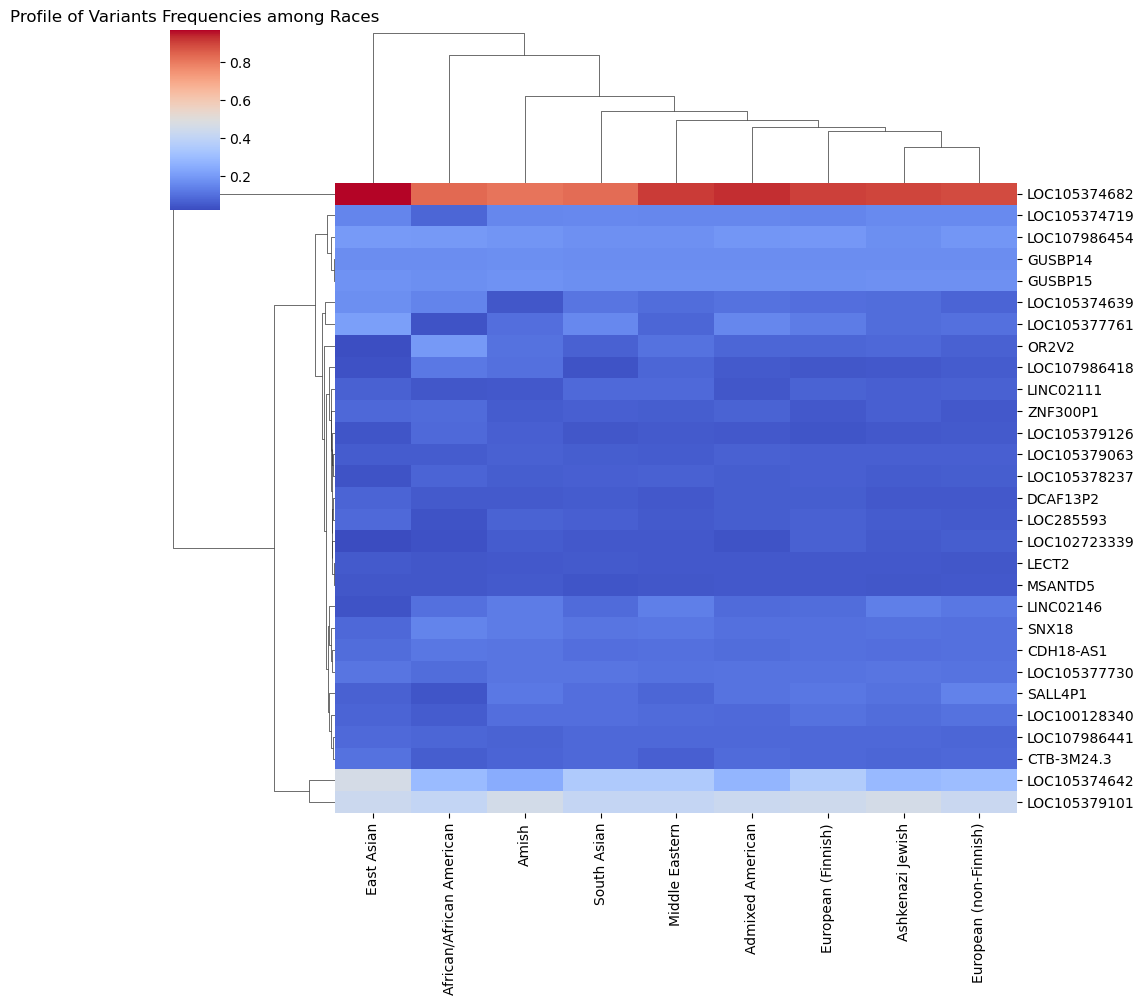

In [32]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'Middle Eastern', 'East Asian', 'South Asian']


genenames = gnom_df_first_occurrence[gnom_df_first_occurrence['Chromosome'] == 'chr6']['Gene'].unique()

# Example DataFrame creation
data = {
    x: [gnom_df_first_occurrence[gnom_df_first_occurrence['Gene'] == y]["Allele Frequency " + x].mean() for y in genenames] for x in colnames
}
df = pd.DataFrame(data)

df = df.set_index(genenames)


df = df.fillna(0)


# Calculate the mean allele frequency for each row
row_means = df.mean(axis=1)

# Step 1: Select the top 20 genes with the highest mean allele frequency
top_20_genes = row_means.nlargest(20).index

# Step 2: Subset the original dataframe 'df' to keep only the rows corresponding to the top 20 genes
filtered_df = df.loc[top_20_genes]



# Create a clustermap using seaborn
plt.figure(figsize=(9, 6))
sns.clustermap(filtered_df, cmap='coolwarm', method='average', metric='euclidean', annot=False)


# Set labels for the plot
plt.title('Profile of Variants Frequencies among Races')
plt.show()

<Figure size 900x600 with 0 Axes>

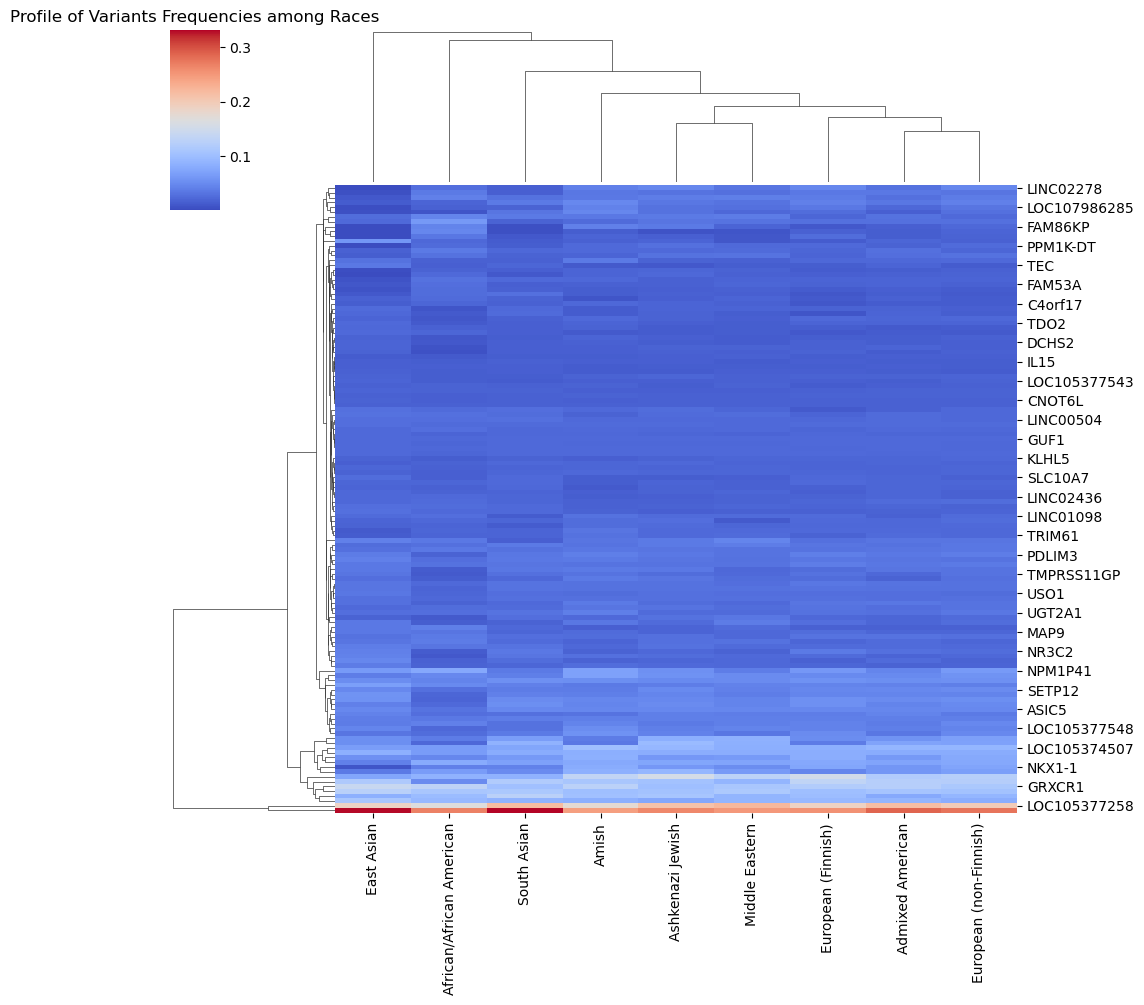

In [33]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'Middle Eastern', 'East Asian', 'South Asian']


genenames = gnom_df_first_occurrence[gnom_df_first_occurrence['Chromosome'] == 'chr4']['Gene'].unique()

# Example DataFrame creation
data = {
    x: [gnom_df_first_occurrence[gnom_df_first_occurrence['Gene'] == y]["Allele Frequency " + x].mean() for y in genenames] for x in colnames
}
df = pd.DataFrame(data)

df = df.set_index(genenames)


df = df.fillna(0)


# Calculate the mean allele frequency for each row
row_means = df.mean(axis=1)

# Step 1: Select the top 20 genes with the highest mean allele frequency
top_20_genes = row_means.nlargest(20).index

# Step 2: Subset the original dataframe 'df' to keep only the rows corresponding to the top 20 genes
filtered_df = df.loc[top_20_genes]



# Create a clustermap using seaborn
plt.figure(figsize=(9, 6))
sns.clustermap(filtered_df, cmap='coolwarm', method='average', metric='euclidean', annot=False)


# Set labels for the plot
plt.title('Profile of Variants Frequencies among Races')
plt.show()

<Figure size 900x600 with 0 Axes>

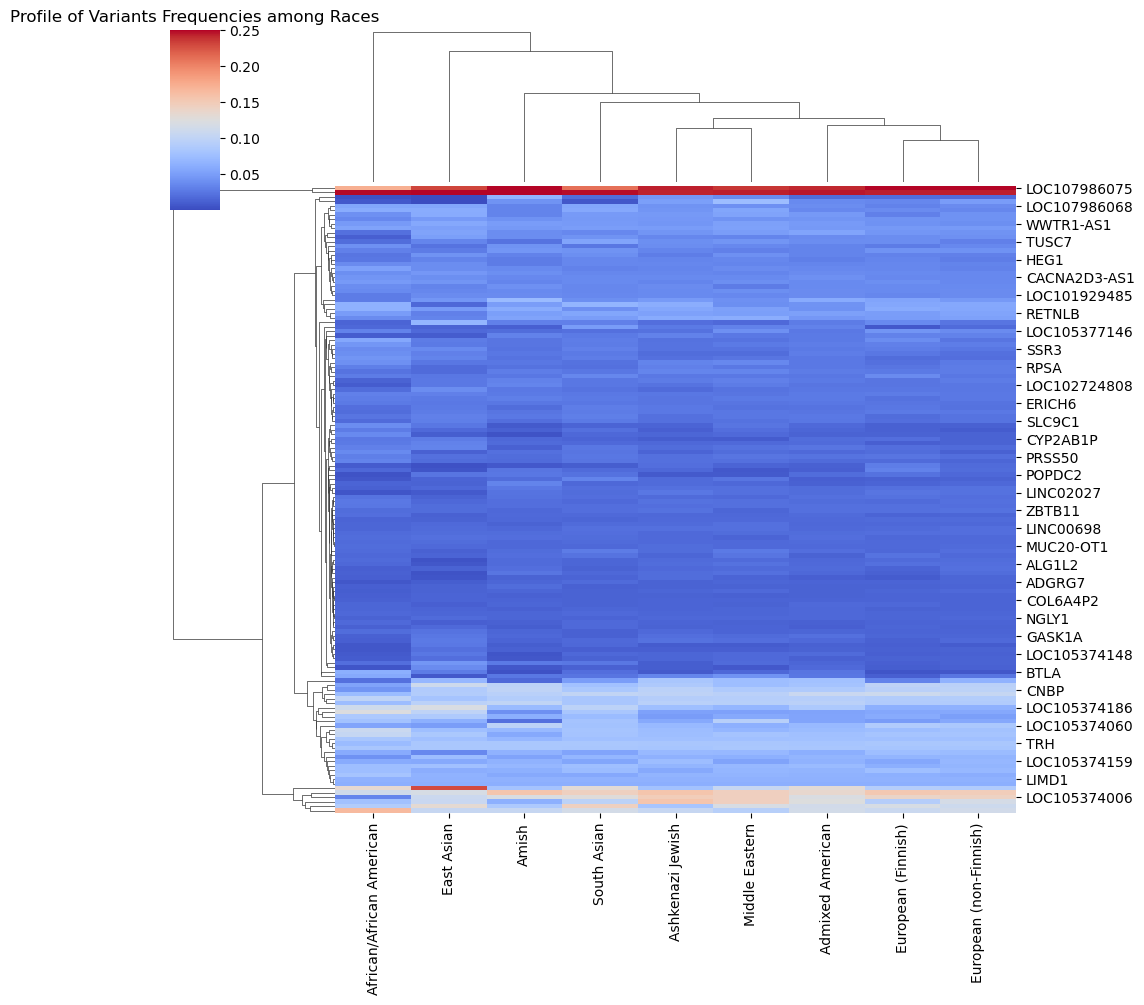

In [34]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'Middle Eastern', 'East Asian', 'South Asian']


genenames = gnom_df_first_occurrence[gnom_df_first_occurrence['Chromosome'] == 'chr3']['Gene'].unique()

# Example DataFrame creation
data = {
    x: [gnom_df_first_occurrence[gnom_df_first_occurrence['Gene'] == y]["Allele Frequency " + x].mean() for y in genenames] for x in colnames
}
df = pd.DataFrame(data)

df = df.set_index(genenames)


df = df.fillna(0)


# Calculate the mean allele frequency for each row
row_means = df.mean(axis=1)

# Step 1: Select the top 20 genes with the highest mean allele frequency
top_20_genes = row_means.nlargest(20).index

# Step 2: Subset the original dataframe 'df' to keep only the rows corresponding to the top 20 genes
filtered_df = df.loc[top_20_genes]



# Create a clustermap using seaborn
plt.figure(figsize=(9, 6))
sns.clustermap(filtered_df, cmap='coolwarm', method='average', metric='euclidean', annot=False)


# Set labels for the plot
plt.title('Profile of Variants Frequencies among Races')
plt.show()

<Figure size 900x600 with 0 Axes>

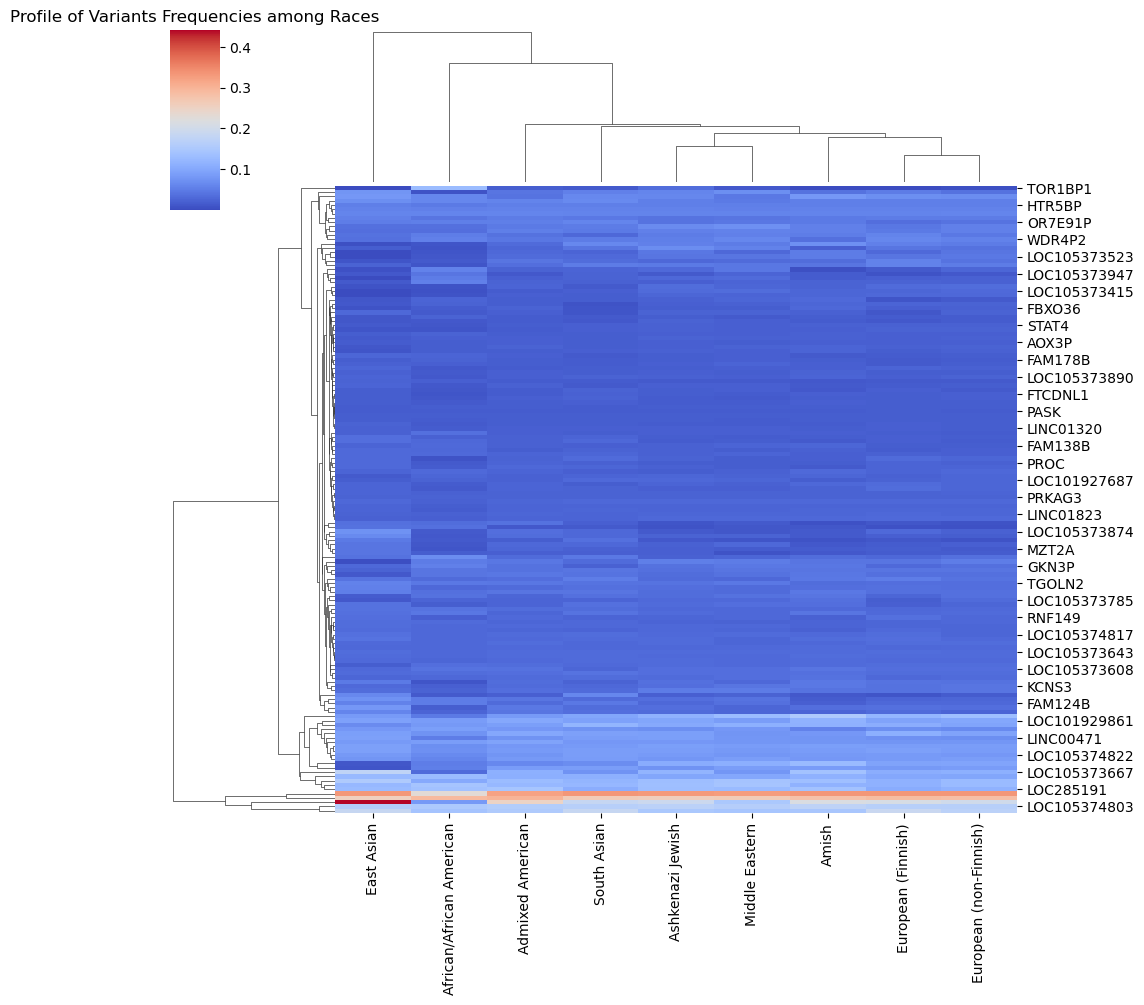

In [35]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'Middle Eastern', 'East Asian', 'South Asian']


genenames = gnom_df_first_occurrence[gnom_df_first_occurrence['Chromosome'] == 'chr2']['Gene'].unique()

# Example DataFrame creation
data = {
    x: [gnom_df_first_occurrence[gnom_df_first_occurrence['Gene'] == y]["Allele Frequency " + x].mean() for y in genenames] for x in colnames
}
df = pd.DataFrame(data)

df = df.set_index(genenames)


df = df.fillna(0)


# Calculate the mean allele frequency for each row
row_means = df.mean(axis=1)

# Step 1: Select the top 20 genes with the highest mean allele frequency
top_20_genes = row_means.nlargest(20).index

# Step 2: Subset the original dataframe 'df' to keep only the rows corresponding to the top 20 genes
filtered_df = df.loc[top_20_genes]



# Create a clustermap using seaborn
plt.figure(figsize=(9, 6))
sns.clustermap(filtered_df, cmap='coolwarm', method='average', metric='euclidean', annot=False)


# Set labels for the plot
plt.title('Profile of Variants Frequencies among Races')
plt.show()

<Figure size 900x600 with 0 Axes>

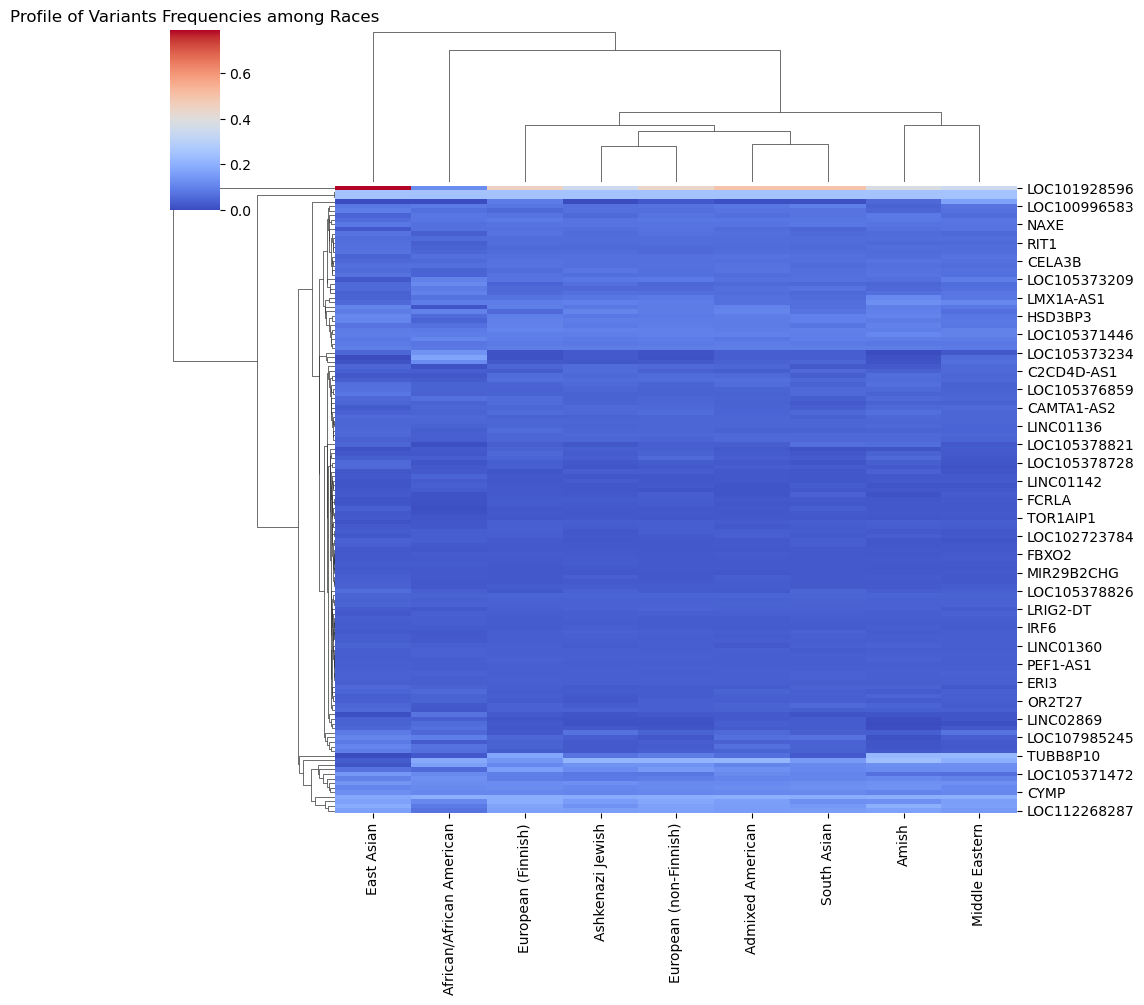

In [36]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'Middle Eastern', 'East Asian', 'South Asian']


genenames = gnom_df_first_occurrence[gnom_df_first_occurrence['Chromosome'] == 'chr1']['Gene'].unique()

# Example DataFrame creation
data = {
    x: [gnom_df_first_occurrence[gnom_df_first_occurrence['Gene'] == y]["Allele Frequency " + x].mean() for y in genenames] for x in colnames
}
df = pd.DataFrame(data)

df = df.set_index(genenames)


df = df.fillna(0)


# Calculate the mean allele frequency for each row
row_means = df.mean(axis=1)

# Step 1: Select the top 20 genes with the highest mean allele frequency
top_20_genes = row_means.nlargest(20).index

# Step 2: Subset the original dataframe 'df' to keep only the rows corresponding to the top 20 genes
filtered_df = df.loc[top_20_genes]



# Create a clustermap using seaborn
plt.figure(figsize=(9, 6))
sns.clustermap(filtered_df, cmap='coolwarm', method='average', metric='euclidean', annot=False)


# Set labels for the plot
plt.title('Profile of Variants Frequencies among Races')
plt.show()

<Figure size 900x600 with 0 Axes>

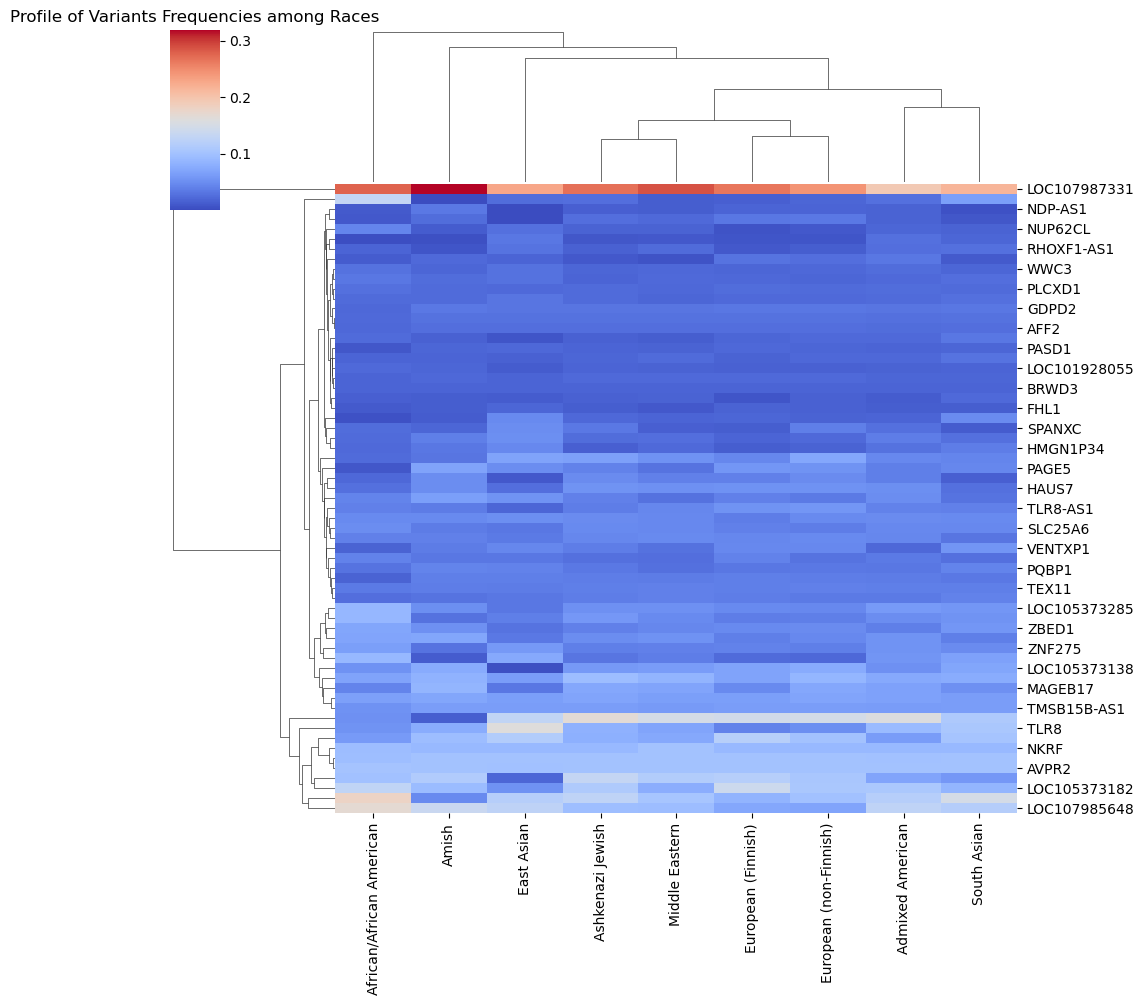

In [38]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'Middle Eastern', 'East Asian', 'South Asian']


genenames = gnom_df_first_occurrence[gnom_df_first_occurrence['Chromosome'] == 'chrX']['Gene'].unique()

# Example DataFrame creation
data = {
    x: [gnom_df_first_occurrence[gnom_df_first_occurrence['Gene'] == y]["Allele Frequency " + x].mean() for y in genenames] for x in colnames
}
df = pd.DataFrame(data)

df = df.set_index(genenames)


df = df.fillna(0)

# Specify the percentage cutoff (e.g., 10%)
percentage_cutoff = 0.05

# Calculate the mean allele frequency for each row
row_means = df.mean(axis=1)

# Calculate the cutoff value based on the percentage of max_af
cutoff = row_means.max() * percentage_cutoff

# Filter rows where the mean allele frequency is greater than or equal to the cutoff
filtered_df = df[row_means >= cutoff]
#filtered_df = df



# Create a clustermap using seaborn
plt.figure(figsize=(9, 6))
sns.clustermap(filtered_df, cmap='coolwarm', method='average', metric='euclidean', annot=False)


# Set labels for the plot
plt.title('Profile of Variants Frequencies among Races')
plt.show()

<Figure size 900x600 with 0 Axes>

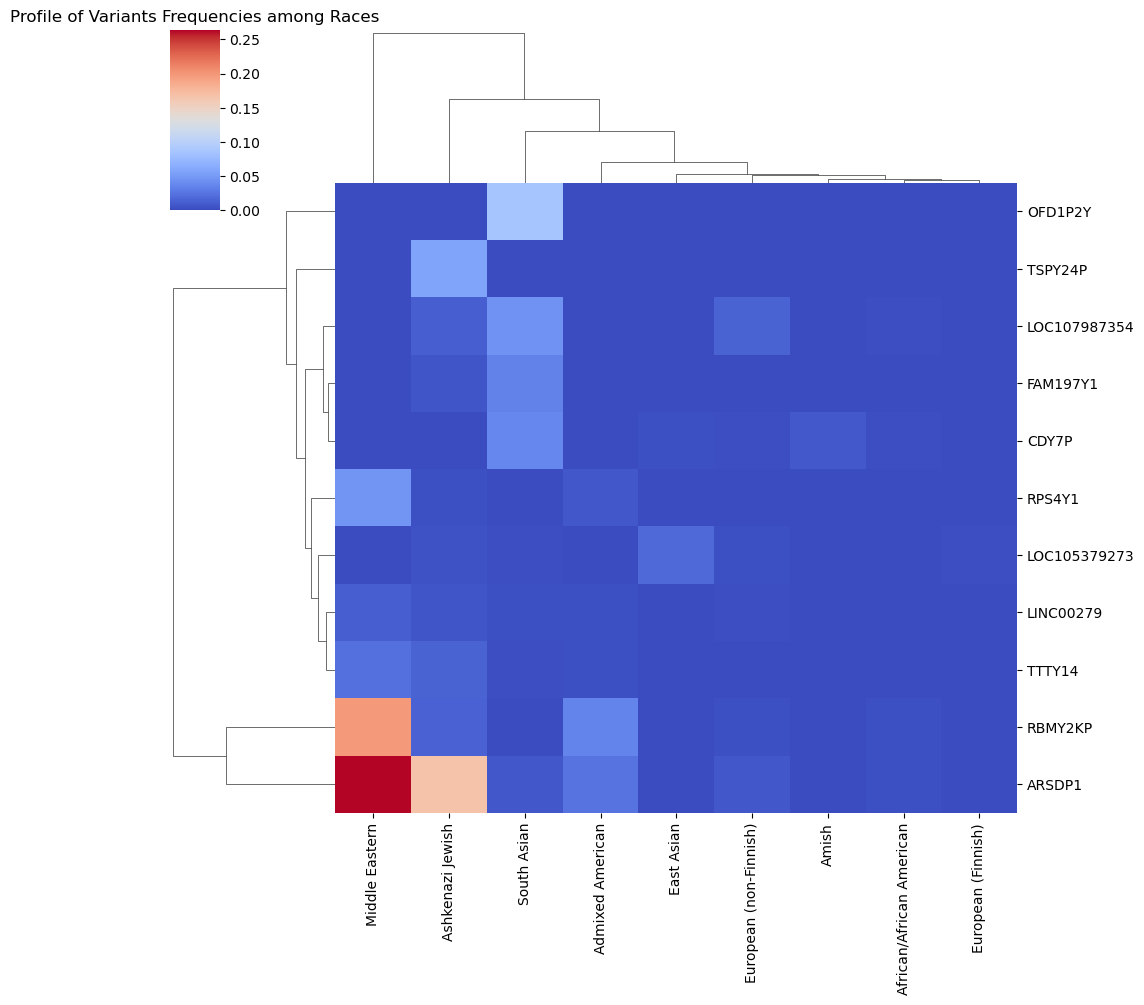

In [39]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

colnames = ['Amish', 'Admixed American', 'African/African American', \
                 'Ashkenazi Jewish',  "European (Finnish)", "European (non-Finnish)", \
                'Middle Eastern', 'East Asian', 'South Asian']


genenames = gnom_df_first_occurrence[gnom_df_first_occurrence['Chromosome'] == 'chrY']['Gene'].unique()

# Example DataFrame creation
data = {
    x: [gnom_df_first_occurrence[gnom_df_first_occurrence['Gene'] == y]["Allele Frequency " + x].mean() for y in genenames] for x in colnames
}
df = pd.DataFrame(data)

df = df.set_index(genenames)


df = df.fillna(0)

# Specify the percentage cutoff (e.g., 10%)
percentage_cutoff = 0.05

# Calculate the mean allele frequency for each row
row_means = df.mean(axis=1)

# Calculate the cutoff value based on the percentage of max_af
cutoff = row_means.max() * percentage_cutoff

# Filter rows where the mean allele frequency is greater than or equal to the cutoff
filtered_df = df[row_means >= cutoff]
#filtered_df = df



# Create a clustermap using seaborn
plt.figure(figsize=(9, 6))
sns.clustermap(filtered_df, cmap='coolwarm', method='average', metric='euclidean', annot=False)


# Set labels for the plot
plt.title('Profile of Variants Frequencies among Races')
plt.show()